# Análise de Dados

### Imports

In [1]:
pip install dash plotly


Note: you may need to restart the kernel to use updated packages.


In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html

C:\Users\marce\AppData\Local\Temp\ipykernel_18028\954449312.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\marce\AppData\Local\Temp\ipykernel_18028\954449312.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [1]:
!pip install polars


In [3]:
import pandas            as pd
import streamlit as st
import numpy             as np
import polars            as pl
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)


### Load Data

In [12]:
df = pd.read_csv('MICRODADOS_ENEM_2021.csv',sep=';', encoding= 'ISO-8859-1' )

In [13]:
df.shape

(1048575, 76)

In [16]:
df.dropna(how='any')

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3,"2,10052E+11",2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,"2,10051E+11",2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
33,"2,10053E+11",2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0,C,C,A,A,6.0,B,A,C,C,B,B,B,B,A,A,A,A,A,B,A,A,C,A,B,B
45,"2,10053E+11",2021,4,F,1,3,1,2,0,2,1.0,0,3203502.0,Montanha,32.0,ES,1.0,1.0,1.0,3204104,Pinheiros,32,ES,1,1,1,1,912.0,882.0,891.0,901.0,476.8,608.5,534.2,570.2,CADCBCEEEBCBDEDDDDCDCABCBBDECEDBEACDBCABBECCD,DBAAAABAEADADABEACBBABEDBAAECCADBCBABEBBCCECC,99999AEAEADABBBEDCAECBEADDEACBEADEECDBBDDCDBCB...,ACCDEECBCEBECEBCDBEBBDEBDCCDEBECADABABCCEDCAA,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,160.0,120.0,120.0,120.0,640.0,H,E,B,B,4.0,C,A,C,C,A,A,B,B,B,A,A,A,A,B,A,A,C,A,A,B
51,"2,10051E+11",2021,3,M,1,3,1,2,0,2,1.0,0,3204906.0,São Mateus,32.0,ES,2.0,1.0,1.0,3204906,São Mateus,32,ES,1,1,1,1,910.0,879.0,889.0,900.0,433.4,622.0,548.3,579.4,BAAEECBABBDAABCCBBBDCBBDEBBAEDCEEBDDCCABDEDCB,BABCDCBBCBCBEBBADBEABEECCAEBEDAAAEBBBAABBEADC,99999CEEAABCCDEADEBADEDBCEDBBABACCBAEEBCDACADB...,BDCCDCDCABABBABAACAABBDEEBDCCBCAABCCDCEDADDBA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,160.0,140.0,140.0,680.0,E,F,D,D,4.0,D,A,C,D,A,A,B,A,B,A,A,A,A,B,A,A,D,A,B,B
...,

In [17]:
ColunasSelecionadas = ['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']


In [18]:
df = df.filter(items=ColunasSelecionadas)

In [20]:
df = df.dropna()

In [21]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3,"2,10052E+11",2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,"2,10051E+11",2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
33,"2,10053E+11",2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0,C,C,A,A,6.0,B,A,C,C,B,B,B,B,A,A,A,A,A,B,A,A,C,A,B,B
45,"2,10053E+11",2021,4,F,1,3,1,2,0,2,1.0,0,3203502.0,Montanha,32.0,ES,1.0,1.0,1.0,3204104,Pinheiros,32,ES,1,1,1,1,912.0,882.0,891.0,901.0,476.8,608.5,534.2,570.2,CADCBCEEEBCBDEDDDDCDCABCBBDECEDBEACDBCABBECCD,DBAAAABAEADADABEACBBABEDBAAECCADBCBABEBBCCECC,99999AEAEADABBBEDCAECBEADDEACBEADEECDBBDDCDBCB...,ACCDEECBCEBECEBCDBEBBDEBDCCDEBECADABABCCEDCAA,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,160.0,120.0,120.0,120.0,640.0,H,E,B,B,4.0,C,A,C,C,A,A,B,B,B,A,A,A,A,B,A,A,C,A,A,B
51,"2,10051E+11",2021,3,M,1,3,1,2,0,2,1.0,0,3204906.0,São Mateus,32.0,ES,2.0,1.0,1.0,3204906,São Mateus,32,ES,1,1,1,1,910.0,879.0,889.0,900.0,433.4,622.0,548.3,579.4,BAAEECBABBDAABCCBBBDCBBDEBBAEDCEEBDDCCABDEDCB,BABCDCBBCBCBEBBADBEABEECCAEBEDAAAEBBBAABBEADC,99999CEEAABCCDEADEBADEDBCEDBBABACCBAEEBCDACADB...,BDCCDCDCABABBABAACAABBDEEBDCCBCAABCCDCEDADDBA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,160.0,140.0,140.0,680.0,E,F,D,D,4.0,D,A,C,D,A,A,B,A,B,A,A,A,A,B,A,A,D,A,B,B


In [22]:
# Colunas
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

### Microdados ENEM

Grupos de variáveis
* Dados do participante
* Dados da escola
* Dados do local de aplicação da prova
* Dados da prova objetiva
* Dados da redação
* Dados do questionário socioeconômico

#### Desafio :Elaborar um gráfico de pareto com os estados e as maiores notas.

### Inspeção de Dados

Hipótese levantadas

*   Padrões espaciais afetam o desempenho escolar?
*   Características municipais afetam o desempenho escolar?
*   Renda familiar pode afetar a nota dos alunos?
*   Há diferença de desempenho entre escolar públicas e privadas?
*   Qual matéria tem maior nota naquela região?



In [23]:
# leitura das 5 primeiras linhas
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3,"2,10052E+11",2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,"2,10051E+11",2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
33,"2,10053E+11",2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0,C,C,A,A,6.0,B,A,C,C,B,B,B,B,A,A,A,A,A,B,A,A,C,A,B,B
45,"2,10053E+11",2021,4,F,1,3,1,2,0,2,1.0,0,3203502.0,Montanha,32.0,ES,1.0,1.0,1.0,3204104,Pinheiros,32,ES,1,1,1,1,912.0,882.0,891.0,901.0,476.8,608.5,534.2,570.2,CADCBCEEEBCBDEDDDDCDCABCBBDECEDBEACDBCABBECCD,DBAAAABAEADADABEACBBABEDBAAECCADBCBABEBBCCECC,99999AEAEADABBBEDCAECBEADDEACBEADEECDBBDDCDBCB...,ACCDEECBCEBECEBCDBEBBDEBDCCDEBECADABABCCEDCAA,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,160.0,120.0,120.0,120.0,640.0,H,E,B,B,4.0,C,A,C,C,A,A,B,B,B,A,A,A,A,B,A,A,C,A,A,B
51,"2,10051E+11",2021,3,M,1,3,1,2,0,2,1.0,0,3204906.0,São Mateus,32.0,ES,2.0,1.0,1.0,3204906,São Mateus,32,ES,1,1,1,1,910.0,879.0,889.0,900.0,433.4,622.0,548.3,579.4,BAAEECBABBDAABCCBBBDCBBDEBBAEDCEEBDDCCABDEDCB,BABCDCBBCBCBEBBADBEABEECCAEBEDAAAEBBBAABBEADC,99999CEEAABCCDEADEBADEDBCEDBBABACCBAEEBCDACADB...,BDCCDCDCABABBABAACAABBDEEBDCCBCAABCCDCEDADDBA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,160.0,140.0,140.0,680.0,E,F,D,D,4.0,D,A,C,D,A,A,B,A,B,A,A,A,A,B,A,A,D,A,B,B


In [24]:
df.head(n = 10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3,"2,10052E+11",2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,"2,10051E+11",2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
33,"2,10053E+11",2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0,C,C,A,A,6.0,B,A,C,C,B,B,B,B,A,A,A,A,A,B,A,A,C,A,B,B
45,"2,10053E+11",2021,4,F,1,3,1,2,0,2,1.0,0,3203502.0,Montanha,32.0,ES,1.0,1.0,1.0,3204104,Pinheiros,32,ES,1,1,1,1,912.0,882.0,891.0,901.0,476.8,608.5,534.2,570.2,CADCBCEEEBCBDEDDDDCDCABCBBDECEDBEACDBCABBECCD,DBAAAABAEADADABEACBBABEDBAAECCADBCBABEBBCCECC,99999AEAEADABBBEDCAECBEADDEACBEADEECDBBDDCDBCB...,ACCDEECBCEBECEBCDBEBBDEBDCCDEBECADABABCCEDCAA,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,160.0,120.0,120.0,120.0,640.0,H,E,B,B,4.0,C,A,C,C,A,A,B,B,B,A,A,A,A,B,A,A,C,A,A,B
51,"2,10051E+11",2021,3,M,1,3,1,2,0,2,1.0,0,3204906.0,São Mateus,32.0,ES,2.0,1.0,1.0,3204906,São Mateus,32,ES,1,1,1,1,910.0,879.0,889.0,900.0,433.4,622.0,548.3,579.4,BAAEECBABBDAABCCBBBDCBBDEBBAEDCEEBDDCCABDEDCB,BABCDCBBCBCBEBBADBEABEECCAEBEDAAAEBBBAABBEADC,99999CEEAABCCDEADEBADEDBCEDBBABACCBAEEBCDACADB...,BDCCDCDCABABBABAACAABBDEEBDCCBCAABCCDCEDADDBA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,160.0,140.0,140.0,680.0,E,F,D,D,4.0,D,A,C,D,A,A,B,A,B,A,A,A,A,B,A,A,D,A,B,B
55,"

In [25]:
# leitura das 5 últimas linhas
df.tail()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1048551,"2,10052E+11",2021,3,M,1,3,1,2,0,2,1.0,0,2101202.0,Bacabal,21.0,MA,2.0,1.0,1.0,2101202,Bacabal,21,MA,1,1,1,1,911.0,880.0,890.0,902.0,586.9,688.0,585.5,525.2,CBEEBCCBDCBDEDDDECCBCBAABDDBACDEBCEAAEABBECEC,DBBBAEECABABEECEBAAEEEBCACADADEBDEBBBBDBCEADC,99999CAACCBCCAABEECCABDADEBDACEAECEADCACEDDAAB...,AAACBCACBCEDCDBECCBBAAEDACDCEEDDEAEEBADEDEBCB,1,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,180.0,200.0,200.0,180.0,200.0,960.0,E,E,B,B,3.0,E,A,B,D,A,B,B,A,A,A,B,A,A,B,A,A,C,A,B,B
1048552,"2,10052E+11",2021,3,M,1,1,1,2,0,2,1.0,0,2111300.0,São Luís,21.0,MA,2.0,1.0,1.0,2111300,São Luís,21,MA,1,1,1,1,909.0,881.0,892.0,899.0,428.3,471.3,433.7,488.3,BDBCCADCAEBBAADBABEACEDBCCCBDCBBBAABCBCADBCBE,CBDACBEDBDCBDACADBCCCDBCBCBEDCCAECBDBDADCBABD,99999BACBAEBCBEBCEDCACBCBCBDABBCDBDABCEBACBDCB...,CAAECDDECEBCBBCBDCABBBACBDBDBAABDCCBBDDECBDBA,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,120.0,80.0,100.0,120.0,520.0,E,E,D,F,7.0,D,A,B,C,B,A,B,A,A,B,A,A,A,B,A,A,C,A,A,B
1048554,"2,10054E+11",2021,3,M,1,1,1,2,0,3,1.0,0,4314902.0,Porto Alegre,43.0,RS,4.0,1.0,1.0,4314902,Porto Alegre,43,RS,1,1,1,1,909.0,881.0,892.0,899.0,688.7,741.2,649.9,868.4,EDEEABEEABCBCBCECDCCBEEDAEBAAAECDCEDCDCBCABCE,BCECCAEABADBCAEBAAAEDDEBBBCBBCBAAEEBBBAECCBBA,ABCAC99999CDAADACEBCACBDCEDCADDBBCEDAEEAADADAB...,DEEEBABDDCECCBCBDCDCAEBADEABBCBDEACEDCCADDCAB,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,160.0,200.0,120.0,200.0,200.0,880.0,F,E,F,F,4.0,H,B,C,D,B,B,B,B,B,A,B,B,B,B,A,B,E,B,D,B
1048558,"2,10054E+11",2021,3,F,1,3,2,2,0,2,1.0,0,3171303.0,Viçosa,31.0,MG,2.0,1.0,1.0,3171303,Viçosa,31,MG,1,1,1,1,909.0,881.0,892.0,899.0,443.2,410.5,485.3,422.3,DEBEDBEECBECCACABDEDEBEBEEDABDDCCADBCBAABCAED,AEABEAAACCEAEBEDECEDEBEAECEDBEABECDDBCDBECEDB,99999EACAEADADEDABEBAEBDEEADDEBCEAAEBDEACCCDAC...,DBBEDCBBAEEABECDBABCDBCBBCDBBBCDDADDCEBBCEDBC,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,100.0,120.0,580.0,B,B,B,B,2.0,B,D,B,C,A,A,B,B,A,A,A,A,A,B,B,A,C,A,B,B
1048572,"2,10051E+11",2021,3,F,1,3,1,2,0,2,1.0,0,3534401.0,Osasco,35.0,SP,2.0,1.0,1.0,3534401,Osasco,35,SP,1,1,1,1,911.0,880.0,890.0,902.0,451.0,498.6,523.2,428.2,CDCDEDECEDBDDCBEDECECCDADCBCCBDBCDCBBDBCEECDC,CBADADEACDACBABDACBCAEAEACB.ABECAEEBDACDAEDCB,99999CAAAEBDCACCAEBABCEADEDDCCBADCEADCACEDBDAC...,BADCBCBCCCEAACDBDCBCBAACEDADBBBBEDCCCAEAAEBCB,1,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,100.0,100.0,140.0,140.0,580.0,A,B,C,B,7.0,B,A,B,C,A,A,B,

In [26]:
df.tail(n = 10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1048529,"2,10052E+11",2021,2,M,1,1,1,2,0,3,1.0,0,3118601.0,Contagem,31.0,MG,4.0,1.0,1.0,3118601,Contagem,31,MG,1,1,1,1,911.0,880.0,890.0,902.0,665.6,686.4,636.5,813.2,CDABDDABEDADDDAEBCCCCDEABCDCBCBBAABADCECBEEDA,DBBBAEECBBABEECEAACAACBEACAEAAEDBEBBBCDBCBEDC,ABBCA99999BACACCAACEBBEACDBBAAAADCEADDACEEDCEB...,ECCCABBDEDDDCBDDCABAEBEBADCDCEDCECEBDDBCCDCDA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,140.0,200.0,160.0,180.0,200.0,880.0,G,G,D,E,3.0,M,A,C,C,C,A,B,A,B,A,B,A,B,C,A,A,D,B,D,B
1048530,"2,10053E+11",2021,2,M,1,2,1,2,0,2,1.0,0,3301702.0,Duque de Caxias,33.0,RJ,2.0,1.0,1.0,3301702,Duque de Caxias,33,RJ,1,1,1,1,912.0,882.0,891.0,901.0,387.7,370.1,486.9,460.4,AADADABCBBCEEDDCADAECAAADCABEACEBADBECACACAED,DA*CDCABEDCCABBDABBBECCCEBEEBBCCDDAACDBECBCBE,99999DBACAEABBABABABBBEACBCBEDDBCDEDDABDDBDCCB...,DCDAADCACBBDBCBAAEEABCEECCAEBDDACEDBDBBEECDAC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,200.0,120.0,160.0,180.0,780.0,E,E,C,B,3.0,D,A,B,B,A,A,B,B,B,A,B,A,A,B,A,B,D,A,B,B
1048540,"2,10053E+11",2021,3,F,1,0,1,2,0,3,1.0,0,5108402.0,Várzea Grande,51.0,MT,4.0,1.0,1.0,5108402,Várzea Grande,51,MT,1,1,1,1,909.0,881.0,892.0,899.0,375.7,573.8,471.2,546.4,EABCAEBEADBAADCABDBEEBDAECBDEDEDABCBDCCEDBDDA,BCAECAABBBEBEAEAABAABBEBEBCAACACAEECBEEECEBBA,AACAC99999EEBBCDEBDDBBBBCBACDEBDBBDDEECACCDEAC...,EEAEABEEADEACBEECECBCEBDEDBDBBCDBBBCDDCDDBDDC,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,140.0,200.0,160.0,180.0,200.0,880.0,E,E,D,B,3.0,B,A,C,D,B,A,B,A,B,A,A,A,A,B,A,A,D,A,B,B
1048543,"2,10053E+11",2021,3,M,1,3,1,2,0,2,1.0,0,4315701.0,Rio Pardo,43.0,RS,2.0,1.0,1.0,4315701,Rio Pardo,43,RS,1,1,1,1,909.0,881.0,892.0,899.0,511.7,586.5,539.8,581.3,AECDBDEBACCECDABBDEABECBECEBDAACDBAECDDBEDBEA,BCECCAECBADDEADBCEBBBAEBCCADACABDEBDBBACBEBBA,99999AACDECDBBECDEBCDCDDABCEAADBBEEDEBEACDEDAC...,DACEBCADDCEABEEADCEBADACEACDBEDBDAEBDCEBEACDB,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,140.0,120.0,120.0,120.0,80.0,580.0,D,E,A,B,5.0,D,A,B,D,A,B,B,A,B,A,A,A,B,C,A,A,C,A,A,B
1048548,"2,10054E+11",2021,3,M,1,3,1,2,0,2,1.0,0,2611533.0,Quixaba,26.0,PE,2.0,2.0,1.0,2516607,Tavares,25,PB,1,1,1,1,911.0,880.0,890.0,902.0,428.3,540.6,558.4,669.2,CEDADCBDBCEADCDECACDBEBADCBBCAAEDCABECBDEBACE,CABBADAECEABBECAAEBCAEBCBEAECBBDBABDCADDBEDCC,AACDA99999BDEAECEACCBCDAEDBBABECDBBBBCAACADDDC...,ECCEAABACCDDCADDEBBAEEAEAADEDDDCEA.A..BCDEAEA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,200.0,120.0,120.0,160.0,720.0,

In [27]:
# estatística descritiva
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NU_ANO,236114.0,2.021000e+03,0.000000e+00,2021.0,2021.0,2021.0,2021.0,2021.0
TP_FAIXA_ETARIA,236114.0,2.655171e+00,8.813212e-01,1.0,2.0,3.0,3.0,20.0
TP_ESTADO_CIVIL,236114.0,9.857018e-01,2.291454e-01,0.0,1.0,1.0,1.0,4.0
TP_COR_RACA,236114.0,1.979925e+00,1.025931e+00,0.0,1.0,2.0,3.0,5.0
TP_NACIONALIDADE,236114.0,1.025611e+00,2.067229e-01,0.0,1.0,1.0,1.0,4.0
TP_ST_CONCLUSAO,236114.0,2.000000e+00,0.000000e+00,2.0,2.0,2.0,2.0,2.0
TP_ANO_CONCLUIU,236114.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
TP_ESCOLA,236114.0,2.211508e+00,4.083786e-01,2.0,2.0,2.0,2.0,3.0
TP_ENSINO,236114.0,1.003918e+00,6.246814e-02,1.0,1.0,1.0,1.0,2.0
IN_TREINEIRO,236114.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


Nota: os comandos `df.head()` e `df.tail()` são úteis para inspecionar e compreender o dataset.

In [28]:
# quantidade de linhas x quantidade de colunas
# o resultado é uma tupla - podemos verificar com a função type()
df.shape

(236114, 76)

In [29]:
# Sumário do Dataset
# número de valores não nulos, dtype de cada coluna, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236114 entries, 3 to 1048572
Data columns (total 76 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            236114 non-null  object 
 1   NU_ANO                  236114 non-null  int64  
 2   TP_FAIXA_ETARIA         236114 non-null  int64  
 3   TP_SEXO                 236114 non-null  object 
 4   TP_ESTADO_CIVIL         236114 non-null  int64  
 5   TP_COR_RACA             236114 non-null  int64  
 6   TP_NACIONALIDADE        236114 non-null  int64  
 7   TP_ST_CONCLUSAO         236114 non-null  int64  
 8   TP_ANO_CONCLUIU         236114 non-null  int64  
 9   TP_ESCOLA               236114 non-null  int64  
 10  TP_ENSINO               236114 non-null  float64
 11  IN_TREINEIRO            236114 non-null  int64  
 12  CO_MUNICIPIO_ESC        236114 non-null  float64
 13  NO_MUNICIPIO_ESC        236114 non-null  object 
 14  CO_UF_ESC          

In [30]:
# verifica missing (dados ausentes)
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending = False)

NU_INSCRICAO      0.0
NU_NOTA_COMP4     0.0
Q005              0.0
Q004              0.0
Q003              0.0
                 ... 
TP_PRESENCA_CH    0.0
TP_PRESENCA_CN    0.0
SG_UF_PROVA       0.0
CO_UF_PROVA       0.0
Q025              0.0
Length: 76, dtype: float64

In [31]:
# nome das colunas
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [32]:
# Sumário estatístico dos dados 
# 25%: Primeiro Quartil
# 50%: Segundo Quartil (Mediana)
# 75%: Terceiro Quartil
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NU_ANO,236114.0,2.021000e+03,0.000000e+00,2021.0,2021.0,2021.0,2021.0,2021.0
TP_FAIXA_ETARIA,236114.0,2.655171e+00,8.813212e-01,1.0,2.0,3.0,3.0,20.0
TP_ESTADO_CIVIL,236114.0,9.857018e-01,2.291454e-01,0.0,1.0,1.0,1.0,4.0
TP_COR_RACA,236114.0,1.979925e+00,1.025931e+00,0.0,1.0,2.0,3.0,5.0
TP_NACIONALIDADE,236114.0,1.025611e+00,2.067229e-01,0.0,1.0,1.0,1.0,4.0
TP_ST_CONCLUSAO,236114.0,2.000000e+00,0.000000e+00,2.0,2.0,2.0,2.0,2.0
TP_ANO_CONCLUIU,236114.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
TP_ESCOLA,236114.0,2.211508e+00,4.083786e-01,2.0,2.0,2.0,2.0,3.0
TP_ENSINO,236114.0,1.003918e+00,6.246814e-02,1.0,1.0,1.0,1.0,2.0
IN_TREINEIRO,236114.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [33]:
df.index

Int64Index([      3,       4,      33,      45,      51,      55,      59,
                 63,      71,      75,
            ...
            1048529, 1048530, 1048540, 1048543, 1048548, 1048551, 1048552,
            1048554, 1048558, 1048572],
           dtype='int64', length=236114)

In [34]:
# Quantidade de valores únicos por coluna
df.nunique().sort_values(ascending = True)

TP_PRESENCA_CN          1
NU_ANO                  1
TP_PRESENCA_CH          1
TP_PRESENCA_LC          1
TP_PRESENCA_MT          1
                    ...  
NU_NOTA_MT           5479
TX_RESPOSTAS_CH    235852
TX_RESPOSTAS_LC    236021
TX_RESPOSTAS_MT    236042
TX_RESPOSTAS_CN    236050
Length: 76, dtype: int64

In [35]:
type(df)

pandas.core.frame.DataFrame

### Selecionando colunas

In [36]:
# seleciona uma coluna
df.TP_ESCOLA

3          2
4          2
33         2
45         2
51         2
          ..
1048551    2
1048552    2
1048554    3
1048558    2
1048572    2
Name: TP_ESCOLA, Length: 236114, dtype: int64

In [37]:
# distribuição de frequência 
df.TP_ESCOLA.value_counts()

2    186174
3     49940
Name: TP_ESCOLA, dtype: int64

In [38]:
# seleciona uma coluna
df['TP_ESCOLA']

3          2
4          2
33         2
45         2
51         2
          ..
1048551    2
1048552    2
1048554    3
1048558    2
1048572    2
Name: TP_ESCOLA, Length: 236114, dtype: int64

In [39]:
# seleciona uma coluna
# .loc[] : seleciona colunas pelo label
# sintaxe: df.loc[linhas:colunas]
df.loc[:, 'TP_SEXO']

3          M
4          F
33         M
45         F
51         M
          ..
1048551    M
1048552    M
1048554    M
1048558    F
1048572    F
Name: TP_SEXO, Length: 236114, dtype: object

In [40]:
# seleciona múltiplas 
df[['TP_SEXO', 'TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
3,M,2
4,F,2
33,M,2
45,F,2
51,M,2
...,...,...
1048551,M,2
1048552,M,2
1048554,M,3
1048558,F,2


In [41]:
# seleciona múltiplas colunas com .loc
df.loc[:, ['TP_SEXO', 'TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
3,M,2
4,F,2
33,M,2
45,F,2
51,M,2
...,...,...
1048551,M,2
1048552,M,2
1048554,M,3
1048558,F,2


In [42]:
# .iloc[] : seleciona colunas pela posição
# sintaxe: df.iloc[linhas:colunas]
df.iloc[:, 0]

3          2,10052E+11
4          2,10051E+11
33         2,10053E+11
45         2,10053E+11
51         2,10051E+11
              ...     
1048551    2,10052E+11
1048552    2,10052E+11
1048554    2,10054E+11
1048558    2,10054E+11
1048572    2,10051E+11
Name: NU_INSCRICAO, Length: 236114, dtype: object

In [43]:
# exemplo de seleção com .iloc
df.iloc[0:5, 0]

3     2,10052E+11
4     2,10051E+11
33    2,10053E+11
45    2,10053E+11
51    2,10051E+11
Name: NU_INSCRICAO, dtype: object

Com a função `.select_dtypes()` podemos selecionar colunas de acordo com seu dtype (int, float, bool, etc.). Em várias situações isso pode ser útil, dentre outras coisas para aplicarmos rotinas específicas de acordo com o dtype ou ainda separar as colunas em qualitativas e quantitivas.

In [44]:
# seleciona colunas numéricas
df.select_dtypes(include = [int, float])

,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
3,2021,3,1,3,1,2,0,2,1.0,0,2304202.0,23.0,2.0,1.0,1.0,2304202,23,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,0,1.0,120.0,180.0,120.0,200.0,160.0,780.0,6.0
4,2021,2,1,3,1,2,0,2,1.0,0,2311603.0,23.0,2.0,1.0,1.0,2300150,23,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,1,1.0,120.0,140.0,160.0,180.0,180.0,780.0,4.0
33,2021,3,1,1,1,2,0,2,1.0,0,2932606.0,29.0,2.0,1.0,1.0,2932606,29,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,0,1.0,120.0,180.0,140.0,160.0,100.0,700.0,6.0
45,2021,4,1,3,1,2,0,2,1.0,0,3203502.0,32.0,1.0,1.0,1.0,3204104,32,1,1,1,1,912.0,882.0,891.0,901.0,476.8,608.5,534.2,570.2,1,1.0,120.0,160.0,120.0,120.0,120.0,640.0,4.0
51,2021,3,1,3,1,2,0,2,1.0,0,3204906.0,32.0,2.0,1.0,1.0,3204906,32,1,1,1,1,910.0,879.0,889.0,900.0,433.4,622.0,548.3,579.4,1,1.0,120.0,120.0,160.0,140.0,140.0,680.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048551,2021,3,1,3,1,2,0,2,1.0,0,2101202.0,21.0,2.0,1.0,1.0,2101202,21,1,1,1,1,911.0,880.0,890.0,902.0,586.9,688.0,585.5,525.2,1,1.0,180.0,200.0,200.0,180.0,200.0,960.0,3.0
1048552,2021,3,1,1,1,2,0,2,1.0,0,2111300.0,21.0,2.0,1.0,1.0,2111300,21,1,1,1,1,909.0,881.0,892.0,899.0,428.3,471.3,433.7,488.3,1,1.0,100.0,120.0,80.0,100.0,120.0,520.0,7.0
1048554,2021,3,1,1,1,2,0,3,1.0,0,4314902.0,43.0,4.0,1.0,1.0,4314902,43,1,1,1,1,909.0,881.0,892.0,899.0,688.7,741.2,649.9,868.4,0,1.0,160.0,200.0,120.0,200.0,200.0,880.0,4.0
1048558,2021,3,1,3,2,2,0,2,1.0,0,3171303.0,31.0,2.0,1.0,1.0,3171303,31,1,1,1,1,909.0,881.0,892.0,899.0,443.2,410.5,485.3,422.3,1,1.0,120.0,120.0,120.0,100.0,120.0,580.0,2.0


In [45]:
# outra forma de fazer:
df.select_dtypes(exclude = object)

,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
3,2021,3,1,3,1,2,0,2,1.0,0,2304202.0,23.0,2.0,1.0,1.0,2304202,23,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,0,1.0,120.0,180.0,120.0,200.0,160.0,780.0,6.0
4,2021,2,1,3,1,2,0,2,1.0,0,2311603.0,23.0,2.0,1.0,1.0,2300150,23,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,1,1.0,120.0,140.0,160.0,180.0,180.0,780.0,4.0
33,2021,3,1,1,1,2,0,2,1.0,0,2932606.0,29.0,2.0,1.0,1.0,2932606,29,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,0,1.0,120.0,180.0,140.0,160.0,100.0,700.0,6.0
45,2021,4,1,3,1,2,0,2,1.0,0,3203502.0,32.0,1.0,1.0,1.0,3204104,32,1,1,1,1,912.0,882.0,891.0,901.0,476.8,608.5,534.2,570.2,1,1.0,120.0,160.0,120.0,120.0,120.0,640.0,4.0
51,2021,3,1,3,1,2,0,2,1.0,0,3204906.0,32.0,2.0,1.0,1.0,3204906,32,1,1,1,1,910.0,879.0,889.0,900.0,433.4,622.0,548.3,579.4,1,1.0,120.0,120.0,160.0,140.0,140.0,680.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048551,2021,3,1,3,1,2,0,2,1.0,0,2101202.0,21.0,2.0,1.0,1.0,2101202,21,1,1,1,1,911.0,880.0,890.0,902.0,586.9,688.0,585.5,525.2,1,1.0,180.0,200.0,200.0,180.0,200.0,960.0,3.0
1048552,2021,3,1,1,1,2,0,2,1.0,0,2111300.0,21.0,2.0,1.0,1.0,2111300,21,1,1,1,1,909.0,881.0,892.0,899.0,428.3,471.3,433.7,488.3,1,1.0,100.0,120.0,80.0,100.0,120.0,520.0,7.0
1048554,2021,3,1,1,1,2,0,3,1.0,0,4314902.0,43.0,4.0,1.0,1.0,4314902,43,1,1,1,1,909.0,881.0,892.0,899.0,688.7,741.2,649.9,868.4,0,1.0,160.0,200.0,120.0,200.0,200.0,880.0,4.0
1048558,2021,3,1,3,2,2,0,2,1.0,0,3171303.0,31.0,2.0,1.0,1.0,3171303,31,1,1,1,1,909.0,881.0,892.0,899.0,443.2,410.5,485.3,422.3,1,1.0,120.0,120.0,120.0,100.0,120.0,580.0,2.0


In [46]:
# seleciona colunas str
# df.select_dtypes(exclude = [int, float])
df.select_dtypes(include = object)

,NU_INSCRICAO,TP_SEXO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3,"2,10052E+11",M,Crato,CE,Crato,CE,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,B,B,B,B,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,"2,10051E+11",F,Redenção,CE,Acarape,CE,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,D,E,F,D,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
33,"2,10053E+11",M,Urandi,BA,Urandi,BA,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,C,C,A,A,B,A,C,C,B,B,B,B,A,A,A,A,A,B,A,A,C,A,B,B
45,"2,10053E+11",F,Montanha,ES,Pinheiros,ES,CADCBCEEEBCBDEDDDDCDCABCBBDECEDBEACDBCABBECCD,DBAAAABAEADADABEACBBABEDBAAECCADBCBABEBBCCECC,99999AEAEADABBBEDCAECBEADDEACBEADEECDBBDDCDBCB...,ACCDEECBCEBECEBCDBEBBDEBDCCDEBECADABABCCEDCAA,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,H,E,B,B,C,A,C,C,A,A,B,B,B,A,A,A,A,B,A,A,C,A,A,B
51,"2,10051E+11",M,São Mateus,ES,São Mateus,ES,BAAEECBABBDAABCCBBBDCBBDEBBAEDCEEBDDCCABDEDCB,BABCDCBBCBCBEBBADBEABEECCAEBEDAAAEBBBAABBEADC,99999CEEAABCCDEADEBADEDBCEDBBABACCBAEEBCDACADB...,BDCCDCDCABABBABAACAABBDEEBDCCBCAABCCDCEDADDBA,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,E,F,D,D,D,A,C,D,A,A,B,A,B,A,A,A,A,B,A,A,D,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048551,"2,10052E+11",M,Bacabal,MA,Bacabal,MA,CBEEBCCBDCBDEDDDECCBCBAABDDBACDEBCEAAEABBECEC,DBBBAEECABABEECEBAAEEEBCACADADEBDEBBBBDBCEADC,99999CAACCBCCAABEECCABDADEBDACEAECEADCACEDDAAB...,AAACBCACBCEDCDBECCBBAAEDACDCEEDDEAEEBADEDEBCB,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,E,E,B,B,E,A,B,D,A,B,B,A,A,A,B,A,A,B,A,A,C,A,B,B
1048552,"2,10052E+11",M,São Luís,MA,São Luís,MA,BDBCCADCAEBBAADBABEACEDBCCCBDCBBBAABCBCADBCBE,CBDACBEDBDCBDACADBCCCDBCBCBEDCCAECBDBDADCBABD,99999BACBAEBCBEBCEDCACBCBCBDABBCDBDABCEBACBDCB...,CAAECDDECEBCBBCBDCABBBACBDBDBAABDCCBBDDECBDBA,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,E,E,D,F,D,A,B,C,B,A,B,A,A,B,A,A,A,B,A,A,C,A,A,B
1048554,"2,10054E+11",M,Porto Alegre,RS,Porto Alegre,RS,EDEEABEEABCBCBCECDCCBEEDAEBAAAECDCEDCDCBCABCE,BCECCAEABADBCAEBAAAEDDEBBBCBBCBAAEEBBBAECCBBA,ABCAC99999CDAADACEBCACBDCEDCADDBBCEDAEEAADADAB...,DEEEBABDDCECCBCBDCDCAEBADEABBCBDEACEDCCADDCAB,EDECABE

In [47]:
cat_cols = df.select_dtypes(include = object).columns.tolist()
num_cols = df.select_dtypes(include = [int, float]).columns.tolist()

### Filtro

Existe diferença na nota de matemática entre alunos de escola pública e privada?

In [48]:
# alunos de colégio público
df.query('TP_ESCOLA == 2').NU_NOTA_MT.mean()

518.3995085242839

In [49]:
# alunos de colégio privado
df.query('TP_ESCOLA == 3').NU_NOTA_MT.mean()

625.2837565078094

In [50]:
# alunos de colégio privado
df.query('TP_ESCOLA == 3').NU_NOTA_MT.agg([np.mean, np.median])

mean      625.283757
median    635.200000
Name: NU_NOTA_MT, dtype: float64

In [51]:
# alunos de colégio pública
df.query('TP_ESCOLA == 2').NU_NOTA_MT.agg([np.mean, np.median])

mean      518.399509
median    499.200000
Name: NU_NOTA_MT, dtype: float64

In [52]:
# 1 condição
df.query('TP_SEXO == "M"').sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
888423,"2,10054E+11",2021,3,M,1,4,2,2,0,2,1.0,0,2103000.0,Caxias,21.0,MA,1.0,2.0,1.0,2103000,Caxias,21,MA,1,1,1,1,912.0,882.0,891.0,901.0,476.7,484.9,373.4,540.2,DDEDBABBECEEDDEACBCECDCEDCBBDEBCCABCCCCDBEDCE,EACBAEAACBABDABBECADCDAECBECCEBEDAECDEECECBAC,99999BEDEEECBABCABBEBBBBABADDABCBDCDADCB.EDBCA...,AACDEEAECDCDCDACAEDACDDDCDECAAECEBEDCBBCCBCAD,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,40.0,40.0,120.0,40.0,360.0,B,B,A,A,7.0,B,A,B,E,A,C,B,A,B,A,A,A,A,B,A,A,B,A,B,B
656186,"2,10052E+11",2021,3,M,1,3,1,2,0,2,1.0,0,2408102.0,Natal,24.0,RN,2.0,1.0,1.0,2408102,Natal,24,RN,1,1,1,1,910.0,879.0,889.0,900.0,550.3,553.3,559.7,406.5,ACBACDCDCECAAEDCBEDAABBEAADBCDEBEBDCCDBDAEABD,EDDACCABCDBAAEBACBCDBCACCAEBBCAACACADABAADDCB,CDDAB99999EDCDEADCDDAADDDABBEAAACCAEBBABBABADC...,CBEDEBCAACBBCDCAADDBECDEBAEEDEACAAEAADBEBDABC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,80.0,140.0,120.0,580.0,E,E,D,D,2.0,D,A,C,C,A,A,B,B,B,A,B,A,A,D,B,B,C,A,B,B
336952,"2,10051E+11",2021,3,M,1,2,1,2,0,2,1.0,0,2512101.0,Pombal,25.0,PB,2.0,1.0,1.0,2512101,Pombal,25,PB,1,1,1,1,909.0,881.0,892.0,899.0,524.2,553.8,532.2,541.1,AACBCBCBDBDCECADEDEBBEECBCBBEBACDBEACCCEDEBAD,AEBCCABBCCECAADBDAAABCEBAAAABAAACEBABBABCDABA,ABADD99999EDBBDEECBEBDBDACBBADABAEEDCEEAADBEBE...,EBBABBCDCCAADCCADAECBBDECEDBBEDEBABCACCAEBABB,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,180.0,140.0,120.0,140.0,700.0,A,B,A,C,3.0,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,C,A,A,B
992309,"2,10054E+11",2021,2,M,1,2,1,2,0,2,1.0,0,3519071.0,Hortolândia,35.0,SP,2.0,1.0,1.0,3519071,Hortolândia,35,SP,1,1,1,1,911.0,880.0,890.0,902.0,483.3,520.2,519.8,459.0,CCADBDABBDBACCDCEECBDEECCDDACCBDADACCAEDCEBBC,DBBAADDCBDBEBEBEDECACEBEBCAABEBCAABBECEDCAABC,ABDBD99999DBCABDEDDCDBEDBDDDACEEBECAAABEADBDAB...,CCBADCEBCEEBDCBBCDDBCECABCACDBACDABEADCCDCDDB,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,80.0,80.0,60.0,100.0,60.0,380.0,E,E,B,B,3.0,B,A,C,C,A,A,B,B,B,A,B,A,A,B,A,A,C,A,A,B
575077,"2,10054E+11",2021,3,M,1,1,1,2,0,2,1.0,0,3530508.0,Mococa,35.0,SP,2.0,1.0,1.0,3530508,Mococa,35,SP,1,1,1,1,909.0,881.0,892.0,899.0,425.3,497.4,524.5,492.3,EEACCDBCADCDDEDEEDEAABCDCCAAEDEDADBDCCCBCCDDE,ECEBCADBAAEAEACAABADCBADEDAABCABEBBDAEEDCDAAA,BACAC99999ADBDDADCADDEBBCDDABDDACEADCBAAEECDEB...,EABEEECBADCAEBAAEEDDCBADCDAABAECBBBDAACDCBACD,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,140.0,200.0,700.0,B,D,A,B,4.0,D,A,B,D,B,A,B,A,B,A,A,A,B,B,B,A,E,A,

In [53]:
# validando a nossa consulta
# .unique(): retorna os valores únicos de uma determinada coluna
df.query('TP_SEXO == "M"')['TP_SEXO'].unique()

array(['M'], dtype=object)

Agora vamos retornar um subset com os alunos do sexo Masculino que sejam treineiros. Neste caso usaremos o operador & (`AND`).

In [57]:
df.query('(TP_SEXO == "M") & (IN_TREINEIRO == 1)')

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025


In [59]:
df.query("(TP_SEXO == 'M') & (IN_TREINEIRO == 1)").sample(frac=0.5)  # Adjust the fraction as needed


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025


Se o objetivo fosse retornar os alunos do sexo masculino ou que foram treineiros, poderíamos usar o operador | (`OR`).

In [60]:
df.query("(TP_SEXO == 'M') | (IN_TREINEIRO == 1)").sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
215240,"2,10054E+11",2021,2,M,1,3,1,2,0,2,1.0,0,2611101.0,Petrolina,26.0,PE,2.0,1.0,1.0,2611101,Petrolina,26,PE,1,1,1,1,911.0,880.0,890.0,902.0,563.7,573.4,534.9,545.6,CCBDBDADEBBCCCECECCEADAADCDECCACCCAAAEACBECED,DBABAAEEBAADBECECEACECBEACAEBBBEAEDAEADBCBDEB,BACCA99999BAAAABBACCCBDAADCDAAEADCDBBDEADEDDCA...,ACADCABBADDAACDCAADADAAAEABBCDDCBDDDADCEADEBD,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,160.0,120.0,140.0,120.0,660.0,H,E,C,F,5.0,B,A,B,D,A,A,B,B,A,A,B,A,A,B,A,A,D,A,A,B
659471,"2,10052E+11",2021,3,M,1,3,1,2,0,2,1.0,0,2803005.0,Itabaianinha,28.0,SE,2.0,1.0,1.0,2803005,Itabaianinha,28,SE,1,1,1,1,910.0,879.0,889.0,900.0,492.3,481.1,479.2,648.0,ADECCDBDBCEABECDBBCDACBEBDCAECBAEEDBBDCCAAEAB,BADCACABEDEBADDAEBAAABACCACBEDCEBADACDABCEBCD,99999CDAAAEACDEADADBABBACEDCEBBDAECACDDBADCAEB...,DCCCADCCEBDBEABCABDAEABDCEEADBDCCCBBDAE.BDAEB,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,140.0,140.0,140.0,660.0,C,D,A,F,3.0,B,A,B,C,B,B,B,A,A,A,B,A,A,B,A,A,C,A,B,B
631618,"2,10053E+11",2021,3,M,1,3,1,2,0,2,1.0,0,2302701.0,Campos Sales,23.0,CE,2.0,1.0,1.0,2302701,Campos Sales,23,CE,1,1,1,1,909.0,881.0,892.0,899.0,459.8,346.2,388.0,407.4,ABCCCDDEABBCEDEBCADCBACEDBCDECCCEBCACBCDABDBE,CBADCDCCDECB*DDDEDABADDDABDBDECCDDBDCECEABDDC,99999ECCDDCDBBDBBCDAEBCABABEACCBBAEDBACDACCDCD...,BCCECCDEBACABEBBECDACCCBEBDCDBACBECCADEECDBCC,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,40.0,40.0,80.0,0.0,240.0,D,E,A,A,5.0,C,A,B,D,B,C,B,A,A,A,A,A,A,B,A,A,D,A,A,B
877586,"2,10054E+11",2021,3,M,1,1,1,2,0,2,1.0,0,3171303.0,Viçosa,31.0,MG,1.0,1.0,1.0,3115300,Cataguases,31,MG,1,1,1,1,909.0,881.0,892.0,899.0,654.9,654.0,611.0,795.2,ADEBABEEABCBECABCDABBECABACAECECDCDDCBBBDACCA,BEEBCAABDADBCADBEAEEBDEBBDBDBCBAAAECBEADCABBA,AEEAC99999CDBDEDCEBCDEDDCEDBEDDBBDEDEEEBADCDAA...,DBBEBAADDCECDBCCACDCCABCDEABBCBDEACEDCCADDCDB,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,160.0,160.0,160.0,200.0,160.0,840.0,G,E,D,B,5.0,N,D,D,D,B,A,B,B,B,A,B,A,B,C,B,B,E,B,C,B
223450,"2,10054E+11",2021,2,M,1,3,1,2,0,2,1.0,0,1501402.0,Belém,15.0,PA,2.0,1.0,1.0,1501402,Belém,15,PA,1,1,1,1,909.0,881.0,892.0,899.0,383.8,499.9,430.7,483.2,BCDAEEDBAAEDDBCBEAAADCCBCCECEDADDAABECAEBAAEC,CECCADEABAEAEDCACEBEBAABBDBDDDADABBDBBDBECAEA,EAAED99999BDBDBECAADADADACCDDAADACDDCECBEBDACA...,CABECCAEEAEAABAACDECABDABAEACAEDEABCEDBDDECCB,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,160.0,160.0,160.0,160.0,760.0,E,E,D,F,3.0,A,A,B,B,A,

Outra sintaxe:

In [61]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3,"2,10052E+11",2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,"2,10051E+11",2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
33,"2,10053E+11",2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0,C,C,A,A,6.0,B,A,C,C,B,B,B,B,A,A,A,A,A,B,A,A,C,A,B,B
45,"2,10053E+11",2021,4,F,1,3,1,2,0,2,1.0,0,3203502.0,Montanha,32.0,ES,1.0,1.0,1.0,3204104,Pinheiros,32,ES,1,1,1,1,912.0,882.0,891.0,901.0,476.8,608.5,534.2,570.2,CADCBCEEEBCBDEDDDDCDCABCBBDECEDBEACDBCABBECCD,DBAAAABAEADADABEACBBABEDBAAECCADBCBABEBBCCECC,99999AEAEADABBBEDCAECBEADDEACBEADEECDBBDDCDBCB...,ACCDEECBCEBECEBCDBEBBDEBDCCDEBECADABABCCEDCAA,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,160.0,120.0,120.0,120.0,640.0,H,E,B,B,4.0,C,A,C,C,A,A,B,B,B,A,A,A,A,B,A,A,C,A,A,B
51,"2,10051E+11",2021,3,M,1,3,1,2,0,2,1.0,0,3204906.0,São Mateus,32.0,ES,2.0,1.0,1.0,3204906,São Mateus,32,ES,1,1,1,1,910.0,879.0,889.0,900.0,433.4,622.0,548.3,579.4,BAAEECBABBDAABCCBBBDCBBDEBBAEDCEEBDDCCABDEDCB,BABCDCBBCBCBEBBADBEABEECCAEBEDAAAEBBBAABBEADC,99999CEEAABCCDEADEBADEDBCEDBBABACCBAEEBCDACADB...,BDCCDCDCABABBABAACAABBDEEBDCCBCAABCCDCEDADDBA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,160.0,140.0,140.0,680.0,E,F,D,D,4.0,D,A,C,D,A,A,B,A,B,A,A,A,A,B,A,A,D,A,B,B


In [62]:
# cria uma máscara booleana
mask = df.TP_SEXO == 'M'
mask

3           True
4          False
33          True
45         False
51          True
           ...  
1048551     True
1048552     True
1048554     True
1048558    False
1048572    False
Name: TP_SEXO, Length: 236114, dtype: bool

In [63]:
df[mask]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3,"2,10052E+11",2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
33,"2,10053E+11",2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0,C,C,A,A,6.0,B,A,C,C,B,B,B,B,A,A,A,A,A,B,A,A,C,A,B,B
51,"2,10051E+11",2021,3,M,1,3,1,2,0,2,1.0,0,3204906.0,São Mateus,32.0,ES,2.0,1.0,1.0,3204906,São Mateus,32,ES,1,1,1,1,910.0,879.0,889.0,900.0,433.4,622.0,548.3,579.4,BAAEECBABBDAABCCBBBDCBBDEBBAEDCEEBDDCCABDEDCB,BABCDCBBCBCBEBBADBEABEECCAEBEDAAAEBBBAABBEADC,99999CEEAABCCDEADEBADEDBCEDBBABACCBAEEBCDACADB...,BDCCDCDCABABBABAACAABBDEEBDCCBCAABCCDCEDADDBA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,160.0,140.0,140.0,680.0,E,F,D,D,4.0,D,A,C,D,A,A,B,A,B,A,A,A,A,B,A,A,D,A,B,B
55,"2,10052E+11",2021,5,M,1,2,1,2,0,2,1.0,0,2910503.0,Entre Rios,29.0,BA,2.0,1.0,1.0,2910503,Entre Rios,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,594.4,572.8,536.6,469.6,DCADABEEABDAEDABADCABEACABDAEBECBBBDCCCDBCBCD,BEECCABABABBEAEACBADCAEBEDAABAEAEADCCCAAEEBAA,ABBAB99999ADDBAABABCBBBACADAEDBBCCEEEBEAACCDBE...,DABEACCEACAACBBABBBACCAACBBAAECBBCBEBCCCBABBD,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,100.0,80.0,80.0,80.0,440.0,A,A,A,B,3.0,B,A,B,D,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
59,"2,10053E+11",2021,3,M,1,3,1,2,0,2,1.0,0,3205309.0,Vitória,32.0,ES,2.0,1.0,1.0,3205309,Vitória,32,ES,1,1,1,1,909.0,881.0,892.0,899.0,549.1,572.9,606.8,726.1,DBEDACBCBBBBDAEACABCBECCAEEAEDCCDEDACDBDBAAAE,BBECCCEABECBEDEAAEBADCEBBCBABAABDBBDBEAABCDCA,ABBAB99999CDADEEBCBBDABDCDDBADDBBBAEEBEDADABCC...,BBDEBBDDDADCABCAECCCAEBEDAABBABDCBDBDCCADACCB,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,160.0,200.0,160.0,180.0,200.0,900.0,H,E,F,B,5.0,B,A,B,B,A,A,B,A,A,A,A,A,A,C,A,A,D,A,A,B
...,

In [64]:
df[df.TP_SEXO == "M"].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
388833,"2,10052E+11",2021,3,M,1,3,1,2,0,2,1.0,0,2302107.0,Baturité,23.0,CE,2.0,1.0,1.0,2302107,Baturité,23,CE,1,1,1,1,909.0,881.0,892.0,899.0,511.2,366.4,453.7,481.5,CDDCADEEDDCDBAACAADDBBDEEEAACEADACADCDBCBABBB,ECACECBEACACEDACDAECCEADEDCAAAAEBECBABDCECBDA,99999EBCEDAEDBBCECBBBCCDABECCAABBDADEAEACBAEAA...,DADACBEBCDECBDCABBDDEBEAEBBDBEADECABCCBCDCDCD,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,140.0,120.0,120.0,140.0,120.0,640.0,E,B,D,D,2.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,C,A,A,A
685954,"2,10052E+11",2021,2,M,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,2.0,1.0,1.0,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,487.7,357.0,433.1,571.3,CEDDADCEBDADDDDCCCDBBBDDBCDCAADCECAADEEBABDCD,CBABCEEAAADAEACECAACDEBABECDBEEBADEABCEEDCDAB,DACBE99999CAEABDBBCDBCBADEABCEEDDCDBABCADABBAD...,DDDCECBEDBDADCCBCEAECEEEDBEBCDCCEDECDDBEBEECC,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,80.0,120.0,80.0,100.0,100.0,480.0,E,E,D,B,4.0,F,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,B,B
899325,"2,10053E+11",2021,3,M,1,2,1,2,0,2,1.0,0,3303302.0,Niterói,33.0,RJ,1.0,1.0,1.0,3304904,São Gonçalo,33,RJ,1,1,1,1,909.0,881.0,892.0,899.0,595.7,565.2,599.7,646.6,BAEDACBEADBDDACECAABBECBACBAEACCACDDCDBDBACED,BEECCAECBCDACADCACADCBEDABBDBCAECDDDBADBCDABE,ABEAC99999CDABDEBABCDBCDCBABAEDBBDEDEEEACDCDAC...,EABEDCDDCBCCDBCDBCDBCBDEDEADBBECEDABDDEBDDBDA,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,140.0,80.0,580.0,H,F,F,C,2.0,C,A,C,C,A,A,B,B,B,A,B,A,A,B,A,A,C,A,B,B
774633,"2,10052E+11",2021,2,M,1,2,1,2,0,2,1.0,0,3301009.0,Campos dos Goytacazes,33.0,RJ,2.0,1.0,1.0,3301009,Campos dos Goytacazes,33,RJ,1,1,1,1,912.0,882.0,891.0,901.0,467.7,550.1,508.0,549.7,DABADBBCEEDAAEEEEADCAABBACADAECCEDEDCBADBBAAB,DBCAAABBEABCABBAACBDACBCBEACBCCDEABCBEBBCDDBB,ADADA99999DEBABDBDAEDEEADCCDAEEDDEDCDADACABECD...,DDEAEECDEDEDBECCBDEAEDDDEECBBEACEBDCDBACABADC,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,100.0,120.0,0.0,460.0,E,E,C,D,2.0,D,A,B,C,B,A,B,B,B,A,A,A,A,B,A,A,C,A,B,B
515329,"2,10052E+11",2021,2,M,1,1,1,2,0,2,1.0,0,3529302.0,Matão,35.0,SP,3.0,1.0,1.0,3529302,Matão,35,SP,1,1,1,1,911.0,880.0,890.0,902.0,541.3,582.1,585.5,582.8,CBBDBDCBBEBAEEACDCAEBEAABBBDABDCBCCABDECBEBDB,DBAEADEDACABDECDCAAEABDCAAAEAABDEABEAAABBBADD,DBACA99999CAAACBEADABBEADADDAAEADEEBDAAAEDBBEB...,BCBDACBDBACDCDACCDDABBDDAEEBCDBCEAABBBACABDEE,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,160.0,120.0,120.0,120.0,120.0,640.0,E,G,C,D,4.0

In [65]:
df.loc[df.TP_SEXO == "M"].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
523385,"2,10053E+11",2021,3,M,1,1,1,2,0,2,1.0,0,5300108.0,Brasília,53.0,DF,1.0,1.0,1.0,5300108,Brasília,53,DF,1,1,1,1,910.0,879.0,889.0,900.0,555.0,512.3,538.6,582.1,ABABC.CEEADDCBDCBEBDABAECDCBAEEBEADADCDDAEBAB,EDEDADDBCBEDEBEC.BDAABEBEACBDDDECDAABEBDAECCB,99999CDCAABEDDEAADDBCEDB.ABBDADDBECACEBDDBCAEC...,EDCDDCDCDEABBCBCEDACDABDACBEDACAAABADDEBBCDEA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,100.0,120.0,100.0,140.0,120.0,580.0,G,F,D,D,5.0,J,A,C,D,B,A,B,B,B,A,B,A,A,C,A,B,E,A,C,B
284057,"2,10052E+11",2021,2,M,1,1,1,2,0,3,1.0,0,3530508.0,Mococa,35.0,SP,4.0,1.0,1.0,3530508,Mococa,35,SP,1,1,1,1,911.0,880.0,890.0,902.0,660.1,771.0,676.2,802.1,CDBDBCAEEDEDEEBBBCBBBBDABDDCAABAECDABEDBBEECA,BBBAAEECBBABAECEBAAEADBCACAEABEDCEBBBADBCBEDC,ABBCA99999CDCACCBADCBBDADADDACEADEDADDACEEDDEB...,ECACBDBDBDDDABDDCCBAEAEBABECCEDCCABBADBCCBCDA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,140.0,140.0,160.0,120.0,120.0,680.0,F,F,D,D,3.0,L,A,B,C,B,A,B,B,B,A,B,A,A,D,A,A,D,A,D,B
228979,"2,10054E+11",2021,1,M,1,1,1,2,0,2,1.0,0,2510808.0,Patos,25.0,PB,1.0,1.0,1.0,2510808,Patos,25,PB,1,1,1,1,912.0,882.0,891.0,901.0,501.4,626.2,509.9,725.1,EABCDCECECBDCDBECABACAEAADAEBCDBAAACEDCBBCAEE,EBADBACBEAAABABCECBAAEEDBBADCCAABAEDDABDCAABC,BCAAC99999DBEACCBBAABEEABBCCCBDEBECDDAEAEBCBCA...,DCDAEBACDDEDDEBACBCBEDADDCEECDACEDEADBCBCADCC,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,200.0,180.0,180.0,160.0,880.0,E,E,C,C,4.0,B,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
900595,"2,10052E+11",2021,3,M,1,1,1,2,0,2,1.0,0,2404002.0,Frutuoso Gomes,24.0,RN,2.0,1.0,1.0,2409308,Patu,24,RN,1,1,1,1,911.0,880.0,890.0,902.0,458.8,359.5,492.3,538.7,CCACCDAEDADADECBDCAECCDCBDDEAACBBDDDEEABAECEB,DBBDCAADDAEACACCDCADEDAEBAEBADBCBADACBAAEEACC,ABBCB99999CACAAAAAADDBEDEECABAEADABBCAEAEEDACA...,ABCCCBCCDEDDCABBEACDBEDAEBEBBDCCCABCCBDCADADC,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,140.0,40.0,40.0,100.0,20.0,340.0,D,G,D,D,4.0,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,C,A,B,B
202726,"2,10053E+11",2021,7,M,1,1,1,2,0,2,1.0,0,4113700.0,Londrina,41.0,PR,2.0,1.0,1.0,4113700,Londrina,41,PR,1,1,1,1,910.0,880.0,890.0,900.0,573.8,512.9,466.4,485.0,AABECCDDDCCDBCACECEBABCDCBEACBEEEEECECDBEBDCE,DBAEABDBEACDBEBEABCDACBEAEBABAAACDBDEACBEBCDC,ACEBC99999BDADABDAECDCEAEEBBCDBEDCEADBCCADABDD...,CEADEADCBBDCCDCCCEDCCEBABCEBBDCCCAACEBEDDECEA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,80.0,100.0,80.0,100.0,120.0,480.0,B,H,C,F,7.0,B,A,B,C,B,A,B,B,B,A,A,A,A,B,A

In [67]:
filtered_df = df[(df.TP_SEXO == "M") & (df.IN_TREINEIRO == 1)]

if not filtered_df.empty:
    sample = filtered_df.sample(5)
    # Process or display the sample as needed
else:
    print("No rows found that satisfy the given conditions.")


No rows found that satisfy the given conditions.


In [69]:
filtered_df = df.loc[(df.TP_SEXO == "M") & (df.IN_TREINEIRO == 1)]

if not filtered_df.empty:
    sample = filtered_df.sample(n=5, replace=True, random_state=42)  # Adjust the random_state value as needed
    # Process or display the sample as needed
else:
    print("No rows found that satisfy the given conditions.")


No rows found that satisfy the given conditions.


Uma forma alternativa:

In [72]:
condition_1 = df.TP_SEXO == "M"
condition_2 = df.IN_TREINEIRO == 1
filtered_indices = df.loc[(condition_1) & (condition_2)].index

if not filtered_indices.empty:
    sample_indices = filtered_indices.sample(n=5, replace=True, random_state=42)  # Adjust the random_state value as needed
    sample = df.loc[sample_indices]
    # Process or display the sample as needed
else:
    print("No rows found that satisfy the given conditions.")


No rows found that satisfy the given conditions.


Negação

In [74]:
df[df.NO_MUNICIPIO_PROVA.isin(['São Paulo'])].NO_MUNICIPIO_PROVA.unique()

array(['São Paulo'], dtype=object)

Podemos usar o perador `~` para negar uma determinada condição:

In [75]:
df[~(df.NO_MUNICIPIO_PROVA.isin(['Sao Paulo']))]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3,"2,10052E+11",2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,"2,10051E+11",2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
33,"2,10053E+11",2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0,C,C,A,A,6.0,B,A,C,C,B,B,B,B,A,A,A,A,A,B,A,A,C,A,B,B
45,"2,10053E+11",2021,4,F,1,3,1,2,0,2,1.0,0,3203502.0,Montanha,32.0,ES,1.0,1.0,1.0,3204104,Pinheiros,32,ES,1,1,1,1,912.0,882.0,891.0,901.0,476.8,608.5,534.2,570.2,CADCBCEEEBCBDEDDDDCDCABCBBDECEDBEACDBCABBECCD,DBAAAABAEADADABEACBBABEDBAAECCADBCBABEBBCCECC,99999AEAEADABBBEDCAECBEADDEACBEADEECDBBDDCDBCB...,ACCDEECBCEBECEBCDBEBBDEBDCCDEBECADABABCCEDCAA,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,160.0,120.0,120.0,120.0,640.0,H,E,B,B,4.0,C,A,C,C,A,A,B,B,B,A,A,A,A,B,A,A,C,A,A,B
51,"2,10051E+11",2021,3,M,1,3,1,2,0,2,1.0,0,3204906.0,São Mateus,32.0,ES,2.0,1.0,1.0,3204906,São Mateus,32,ES,1,1,1,1,910.0,879.0,889.0,900.0,433.4,622.0,548.3,579.4,BAAEECBABBDAABCCBBBDCBBDEBBAEDCEEBDDCCABDEDCB,BABCDCBBCBCBEBBADBEABEECCAEBEDAAAEBBBAABBEADC,99999CEEAABCCDEADEBADEDBCEDBBABACCBAEEBCDACADB...,BDCCDCDCABABBABAACAABBDEEBDCCBCAABCCDCEDADDBA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,160.0,140.0,140.0,680.0,E,F,D,D,4.0,D,A,C,D,A,A,B,A,B,A,A,A,A,B,A,A,D,A,B,B
...,

### Visualização de Dados

In [76]:
provas = df.columns[(df.columns.str.contains('NOTA')) & (~df.columns.str.contains('COMP'))].tolist()
idCandidato = ['NU_INSCRICAO']

Utilizando uma sintaxe simples da biblioteca Pandas conseguimos gerar análises gráficas rapidamente. Podemos fazer os seguintes tipos de gráficos:

* Barras
* Pizza
* Linha
* Histograma
* Boxplot
* Densidade
* Área
* Dispersão


Para obter mais detalhes acesse a documentação [aqui](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

Text(0.5, 1.0, 'Tipo escola dos participantes no ENEM 2021')

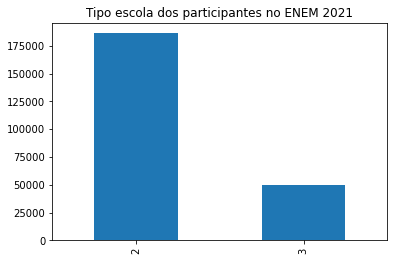

In [77]:
df.TP_ESCOLA.value_counts().plot(kind = 'bar')
plt.title('Tipo escola dos participantes no ENEM 2021')

<AxesSubplot:>

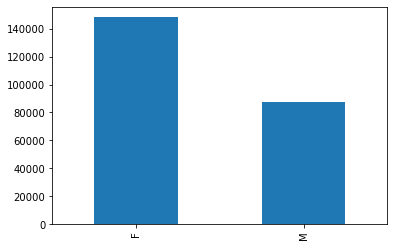

In [78]:
df.TP_SEXO.value_counts().plot(kind = 'bar')

Melhorando um pouco o plot:

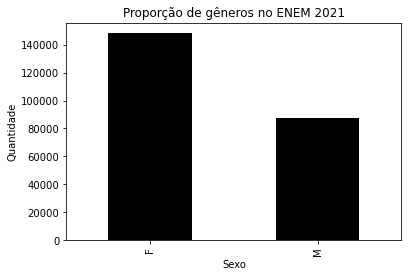

In [79]:
# gráfico de barras
df.TP_SEXO.value_counts().plot(kind = 'bar', color = 'black')
# título
plt.title('Proporção de gêneros no ENEM 2021')
# label do eixo x
plt.xlabel('Sexo')
# label do eixo y
plt.ylabel('Quantidade')

plt.show()
#plt.xlabel('Sexo');plt.ylabel('Quantidade');plt.show()

In [80]:
df.NO_MUNICIPIO_PROVA\
.value_counts()\
.reset_index()

,index,NO_MUNICIPIO_PROVA
0,Fortaleza,10627
1,São Paulo,9914
2,Rio de Janeiro,7915
3,Brasília,4673
4,Goiânia,3452
...,...,...
1703,Mucajaí,1
1704,Porto Walter,1
1705,Marechal Thaumaturgo,1
1706,Ladainha,1


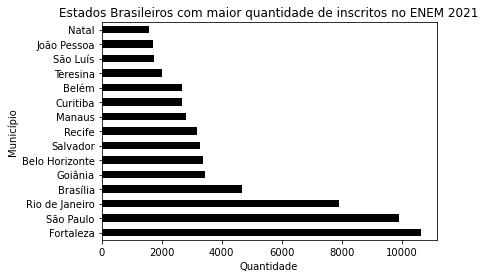

In [82]:
(
    df.NO_MUNICIPIO_PROVA
    .value_counts()
    .reset_index()
    .rename(columns = {'index' : 'Município', 'NO_MUNICIPIO_PROVA': 'Quantidade'})
    .nlargest(n = 15, columns = 'Quantidade')
    .set_index('Município')
    .plot(
        kind = 'barh',
        color = 'black',
        legend = False,
        xlabel = 'Quantidade',
        title = 'Estados Brasileiros com maior quantidade de inscritos no ENEM 2021'
    )
);

Gráfico de pizza

* Proporção entre os gêneros

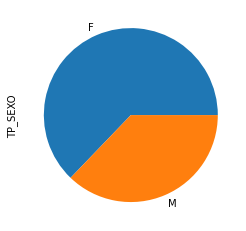

In [83]:
df.TP_SEXO.value_counts().plot(kind = 'pie');

* Tipo escola

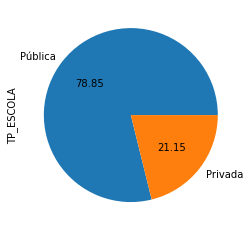

In [84]:
(
    df.TP_ESCOLA.map({1:'Não respondeu', 2:'Pública', 3:'Privada'})
    .value_counts()
    .plot(kind = 'pie', 
          legend = False,
          autopct = '%.2f'
         )
);

Gráfico de dispersão das notas de Matemática e Ciências da Natureza:

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='NU_NOTA_CN'>

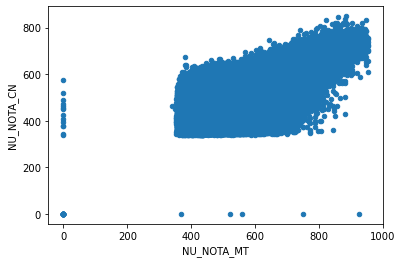

In [85]:
df.plot(kind = 'scatter', x = 'NU_NOTA_MT', y = 'NU_NOTA_CN')

Histograma

<AxesSubplot:ylabel='Frequency'>

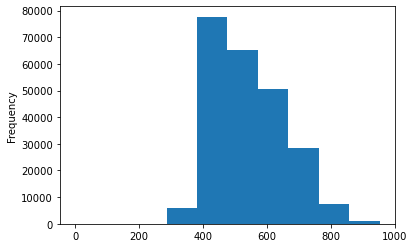

In [86]:
df.NU_NOTA_MT.plot(kind = 'hist')

Boxplot

<AxesSubplot:>

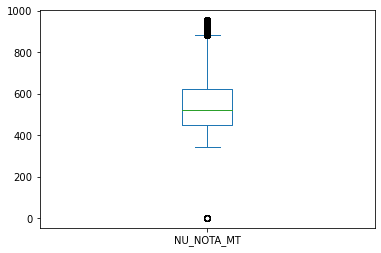

In [87]:
df.NU_NOTA_MT.plot(kind = 'box')

<AxesSubplot:>

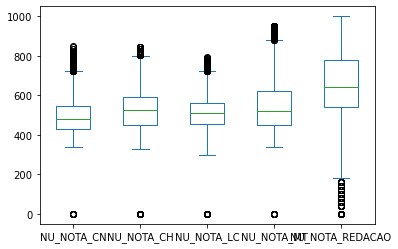

In [88]:
df[provas].plot(kind = 'box')

Kde (densidade)

<AxesSubplot:ylabel='Density'>

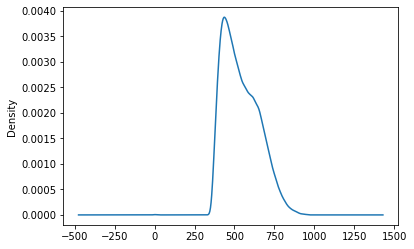

In [89]:
df.NU_NOTA_MT.plot(kind = 'kde')

Gráfico de linhas

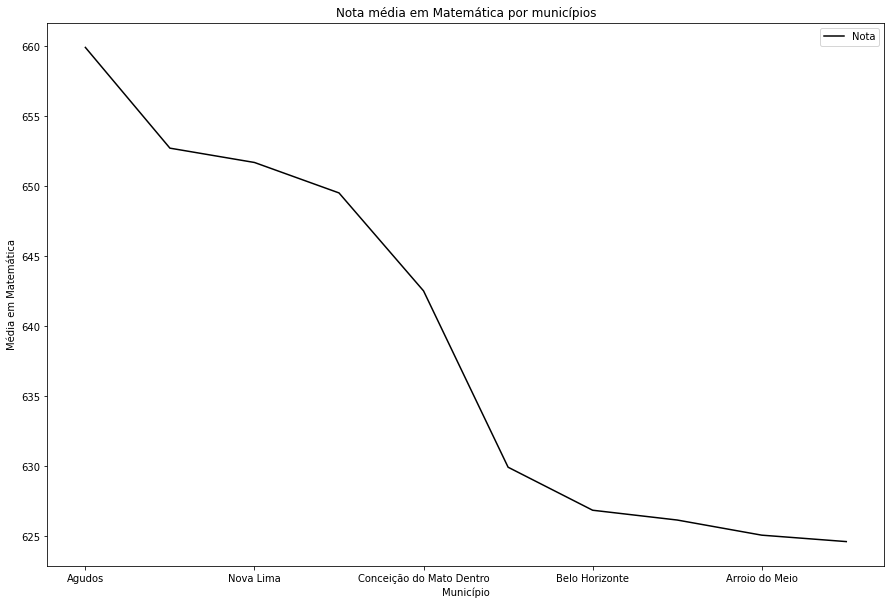

In [90]:
(
    df
    .groupby(by = ['NO_MUNICIPIO_PROVA'])
    .agg({'NU_NOTA_MT': np.mean})
    .reset_index()
    .rename(columns = {'NU_NOTA_MT' : 'Nota', 'NO_MUNICIPIO_PROVA': 'Município'})
    .nlargest(n = 10, columns = 'Nota')
    .plot(
        x       = 'Município', 
        y       = 'Nota', 
        figsize = (15, 10), 
        color   = 'k',
        ylabel  = 'Média em Matemática',
        title   = 'Nota média em Matemática por municípios',
        #ylim    = [520, 545]
        
    )
    
);

### Ordenação

Em alguns casos precisamos ordenar os dados por alguma coluna ou conjunto de colunas. No Pandas podemos utilizar a função `.sort_values()`.

In [91]:
provas = df.columns[(df.columns.str.contains('NOTA')) & (~df.columns.str.contains('COMP'))].tolist()
idCandidato = ['NU_INSCRICAO']

In [92]:
df_subset = df[idCandidato+provas].sample(n = 10, random_state = 9999)

In [93]:
# ordena o dataset em ordem decrescente
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
763254,"2,10053E+11",621.5,593.1,585.5,798.4,920.0
363602,"2,10053E+11",512.0,640.0,632.0,684.4,440.0
428130,"2,10053E+11",500.4,537.1,472.4,584.5,520.0
515846,"2,10052E+11",512.6,594.1,603.1,563.8,760.0
509755,"2,10054E+11",588.5,447.5,627.7,554.1,600.0
268423,"2,10053E+11",407.2,392.5,461.1,476.9,580.0
715524,"2,10053E+11",480.0,530.6,514.3,461.4,580.0
501249,"2,10052E+11",445.4,432.3,384.3,440.6,400.0
394753,"2,10054E+11",413.9,553.5,498.8,408.9,580.0
179117,"2,10053E+11",354.5,399.1,424.6,377.8,0.0


In [94]:
# ordena o dataset em ordem crescente
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = True)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
179117,"2,10053E+11",354.5,399.1,424.6,377.8,0.0
394753,"2,10054E+11",413.9,553.5,498.8,408.9,580.0
501249,"2,10052E+11",445.4,432.3,384.3,440.6,400.0
715524,"2,10053E+11",480.0,530.6,514.3,461.4,580.0
268423,"2,10053E+11",407.2,392.5,461.1,476.9,580.0
509755,"2,10054E+11",588.5,447.5,627.7,554.1,600.0
515846,"2,10052E+11",512.6,594.1,603.1,563.8,760.0
428130,"2,10053E+11",500.4,537.1,472.4,584.5,520.0
363602,"2,10053E+11",512.0,640.0,632.0,684.4,440.0
763254,"2,10053E+11",621.5,593.1,585.5,798.4,920.0


Podemos definir onde queremos inserir os valores ausentes com `na_position`.

In [95]:
df_subset.sort_values(by = ['NU_NOTA_MT'], na_position = 'first', ascending = False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
763254,"2,10053E+11",621.5,593.1,585.5,798.4,920.0
363602,"2,10053E+11",512.0,640.0,632.0,684.4,440.0
428130,"2,10053E+11",500.4,537.1,472.4,584.5,520.0
515846,"2,10052E+11",512.6,594.1,603.1,563.8,760.0
509755,"2,10054E+11",588.5,447.5,627.7,554.1,600.0
268423,"2,10053E+11",407.2,392.5,461.1,476.9,580.0
715524,"2,10053E+11",480.0,530.6,514.3,461.4,580.0
501249,"2,10052E+11",445.4,432.3,384.3,440.6,400.0
394753,"2,10054E+11",413.9,553.5,498.8,408.9,580.0
179117,"2,10053E+11",354.5,399.1,424.6,377.8,0.0


In [96]:
df_subset.sort_values(by = ['NU_NOTA_MT'], na_position = 'last', ascending = False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
763254,"2,10053E+11",621.5,593.1,585.5,798.4,920.0
363602,"2,10053E+11",512.0,640.0,632.0,684.4,440.0
428130,"2,10053E+11",500.4,537.1,472.4,584.5,520.0
515846,"2,10052E+11",512.6,594.1,603.1,563.8,760.0
509755,"2,10054E+11",588.5,447.5,627.7,554.1,600.0
268423,"2,10053E+11",407.2,392.5,461.1,476.9,580.0
715524,"2,10053E+11",480.0,530.6,514.3,461.4,580.0
501249,"2,10052E+11",445.4,432.3,384.3,440.6,400.0
394753,"2,10054E+11",413.9,553.5,498.8,408.9,580.0
179117,"2,10053E+11",354.5,399.1,424.6,377.8,0.0


Podemos efetuar a ordenação por mais de uma coluna:

In [97]:
df_subset.sort_values(by = ['NU_NOTA_MT', 'NU_NOTA_CN'], ascending = [False, False])

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
763254,"2,10053E+11",621.5,593.1,585.5,798.4,920.0
363602,"2,10053E+11",512.0,640.0,632.0,684.4,440.0
428130,"2,10053E+11",500.4,537.1,472.4,584.5,520.0
515846,"2,10052E+11",512.6,594.1,603.1,563.8,760.0
509755,"2,10054E+11",588.5,447.5,627.7,554.1,600.0
268423,"2,10053E+11",407.2,392.5,461.1,476.9,580.0
715524,"2,10053E+11",480.0,530.6,514.3,461.4,580.0
501249,"2,10052E+11",445.4,432.3,384.3,440.6,400.0
394753,"2,10054E+11",413.9,553.5,498.8,408.9,580.0
179117,"2,10053E+11",354.5,399.1,424.6,377.8,0.0


Podemos ainda aplicar a função `.sort_values()` para uma Series, neste caso não precisamos especificar o argumento `by`:

In [98]:
type(df.NU_NOTA_MT)

pandas.core.series.Series

In [99]:
df_subset.NU_NOTA_MT.sort_values()

179117    377.8
394753    408.9
501249    440.6
715524    461.4
268423    476.9
509755    554.1
515846    563.8
428130    584.5
363602    684.4
763254    798.4
Name: NU_NOTA_MT, dtype: float64

In [100]:
df_subset.NU_NOTA_MT.sort_values(ascending = True, na_position = 'first')

179117    377.8
394753    408.9
501249    440.6
715524    461.4
268423    476.9
509755    554.1
515846    563.8
428130    584.5
363602    684.4
763254    798.4
Name: NU_NOTA_MT, dtype: float64

Em alguns casos estamos interessados em criar um ranking. Vamos filtra a base para os candidatos que fizeram a prova em Salvador e posteriormente criar um top 10 na prova de Matemática.

In [104]:
df_subset = df.query('NO_MUNICIPIO_PROVA == "Salvador"')[idCandidato+provas]

In [105]:
df_subset

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
839,"2,10053E+11",505.2,588.9,537.8,565.5,900.0
2372,"2,10052E+11",402.0,519.6,545.8,629.3,680.0
2503,"2,10052E+11",465.4,419.9,550.4,629.5,600.0
2619,"2,10051E+11",523.9,621.8,594.1,559.2,660.0
2792,"2,10052E+11",457.1,636.9,543.4,619.8,760.0
...,...,...,...,...,...,...
1046754,"2,10053E+11",641.0,663.4,547.1,634.2,660.0
1047070,"2,10054E+11",562.0,557.4,563.6,646.3,640.0
1047381,"2,10053E+11",511.9,650.1,615.6,528.7,700.0
1047523,"2,10053E+11",578.3,636.6,578.7,656.6,560.0


In [106]:
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = False).iloc[:11, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
953456,"2,10054E+11",667.7,681.3,652.5,928.8,860.0
636291,"2,10051E+11",717.1,774.0,669.3,926.8,920.0
149104,"2,10053E+11",771.1,718.4,662.7,916.2,920.0
551487,"2,10053E+11",701.1,696.9,649.1,903.0,920.0
1000105,"2,10052E+11",708.3,779.5,702.5,896.8,900.0
985453,"2,10054E+11",724.7,714.5,690.9,886.1,920.0
445573,"2,10054E+11",745.6,742.0,611.9,886.0,860.0
378426,"2,10053E+11",704.1,656.5,694.0,883.6,860.0
1024567,"2,10052E+11",733.6,723.6,621.7,881.9,920.0
711600,"2,10052E+11",713.2,730.1,653.9,878.1,840.0


Outra forma de fazer isso seria utilizando a função `nlargest` (para análise contrária podemos usar a função `nsmallest`):

In [107]:
df_subset.nlargest(n = 10, columns = 'NU_NOTA_MT')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
953456,"2,10054E+11",667.7,681.3,652.5,928.8,860.0
636291,"2,10051E+11",717.1,774.0,669.3,926.8,920.0
149104,"2,10053E+11",771.1,718.4,662.7,916.2,920.0
551487,"2,10053E+11",701.1,696.9,649.1,903.0,920.0
1000105,"2,10052E+11",708.3,779.5,702.5,896.8,900.0
985453,"2,10054E+11",724.7,714.5,690.9,886.1,920.0
445573,"2,10054E+11",745.6,742.0,611.9,886.0,860.0
378426,"2,10053E+11",704.1,656.5,694.0,883.6,860.0
1024567,"2,10052E+11",733.6,723.6,621.7,881.9,920.0
711600,"2,10052E+11",713.2,730.1,653.9,878.1,840.0


Podemos ainda analisar por mais de 1 coluna:

In [108]:
df_subset.sort_values(by = ['NU_NOTA_MT', 'NU_NOTA_CN'], ascending = False).iloc[:10, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
953456,"2,10054E+11",667.7,681.3,652.5,928.8,860.0
636291,"2,10051E+11",717.1,774.0,669.3,926.8,920.0
149104,"2,10053E+11",771.1,718.4,662.7,916.2,920.0
551487,"2,10053E+11",701.1,696.9,649.1,903.0,920.0
1000105,"2,10052E+11",708.3,779.5,702.5,896.8,900.0
985453,"2,10054E+11",724.7,714.5,690.9,886.1,920.0
445573,"2,10054E+11",745.6,742.0,611.9,886.0,860.0
378426,"2,10053E+11",704.1,656.5,694.0,883.6,860.0
1024567,"2,10052E+11",733.6,723.6,621.7,881.9,920.0
711600,"2,10052E+11",713.2,730.1,653.9,878.1,840.0


In [109]:
# caso houvesse duplicidade poderíamos passar o argumento keep
# keep = first : take the first occurrence.
# keep = last : take the last occurrence.
# keep = all : do not drop any duplicates, even it means selecting more than n items.
df_subset.nlargest(n = 10, columns = ['NU_NOTA_MT', 'NU_NOTA_CN'], keep = 'first')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
953456,"2,10054E+11",667.7,681.3,652.5,928.8,860.0
636291,"2,10051E+11",717.1,774.0,669.3,926.8,920.0
149104,"2,10053E+11",771.1,718.4,662.7,916.2,920.0
551487,"2,10053E+11",701.1,696.9,649.1,903.0,920.0
1000105,"2,10052E+11",708.3,779.5,702.5,896.8,900.0
985453,"2,10054E+11",724.7,714.5,690.9,886.1,920.0
445573,"2,10054E+11",745.6,742.0,611.9,886.0,860.0
378426,"2,10053E+11",704.1,656.5,694.0,883.6,860.0
1024567,"2,10052E+11",733.6,723.6,621.7,881.9,920.0
711600,"2,10052E+11",713.2,730.1,653.9,878.1,840.0


Ranking com os alunos que obtiveram as menores notas em Matemática e Ciências da Natureza:

In [110]:
df_subset.nsmallest(n = 10, columns = ['NU_NOTA_MT', 'NU_NOTA_CN'], keep = 'first')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
502396,"2,10053E+11",577.5,611.7,637.3,0.0,740.0
1035228,"2,10051E+11",436.5,376.4,459.8,355.9,500.0
617253,"2,10052E+11",411.6,520.3,500.2,357.6,500.0
299802,"2,10054E+11",397.0,352.0,498.3,359.0,0.0
213042,"2,10052E+11",371.9,428.0,382.9,359.9,600.0
766988,"2,10053E+11",420.3,531.7,537.1,361.0,640.0
844640,"2,10054E+11",395.8,387.0,482.7,362.0,340.0
962388,"2,10053E+11",486.5,438.8,498.0,362.1,700.0
768354,"2,10053E+11",496.6,398.2,429.8,362.6,620.0
894382,"2,10052E+11",405.0,517.8,414.4,362.9,380.0


**Índice**

A indexação do Pandas conta as linhas e colunas a partir do zero, mas podemos alterar o índice default do DataFrame e ainda ordenar um DataFrame de acordo com seu índice. Em séries temporais alterar o índice default pode facilitar o trabalho de filtro de datas.

* set_index()

In [111]:
df_subset.set_index('NU_INSCRICAO', inplace = True)

In [112]:
df_subset.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,
"2,10053E+11",505.2,588.9,537.8,565.5,900.0
"2,10052E+11",402.0,519.6,545.8,629.3,680.0
"2,10052E+11",465.4,419.9,550.4,629.5,600.0
"2,10051E+11",523.9,621.8,594.1,559.2,660.0
"2,10052E+11",457.1,636.9,543.4,619.8,760.0


* sort_index()

In [113]:
# ordena o dataset de acordo com o índice
df_subset.sort_index().head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,
"2,10051E+11",547.5,491.9,483.0,520.5,520.0
"2,10051E+11",538.6,668.0,608.4,553.0,780.0
"2,10051E+11",653.0,608.9,541.0,703.9,840.0
"2,10051E+11",627.2,661.3,616.2,664.2,920.0
"2,10051E+11",599.3,515.5,540.7,630.9,600.0


Podemos escolhar mais de uma coluna como índice do DataFrame, com efeito criamos um MultiIndex.

In [114]:
df_test = df.copy().sample(10)
df_test = df_test.set_index(['NO_MUNICIPIO_PROVA', 'TP_SEXO'])

In [115]:
df_test

,,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
NO_MUNICIPIO_PROVA,TP_SEXO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Goiânia,F,"2,10051E+11",2021,3,1,3,1,2,0,2,1.0,0,5208707.0,Goiânia,52.0,GO,2.0,1.0,1.0,5208707,52,GO,1,1,1,1,912.0,882.0,891.0,901.0,440.5,502.1,484.0,567.4,CCECEEABDCDBBBAEAAEACACDABADEBCBCABECCECCBDDD,DABACAEAEACEBDBEABBAABADBDECCCCAEBDEAAAAEAEBA,ACBAB99999ECBBDDADADEBEAABCCBAEADECCAEEADDDAAB...,DDEBEBCCBDACBCAACEBCDBBDCBDBBEDACDAECBBCBDBAE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,140.0,120.0,120.0,140.0,120.0,640.0,E,E,B,B,4.0,G,A,C,D,B,B,B,B,B,A,B,A,A,B,A,A,E,A,B,B
Bambuí,F,"2,10052E+11",2021,3,1,3,1,2,0,3,1.0,0,3105103.0,Bambuí,31.0,MG,4.0,1.0,1.0,3105103,31,MG,1,1,1,1,910.0,879.0,889.0,900.0,391.4,444.8,512.8,476.2,ABDEDABCCBCAECBAEBDADBCECDBCCABEBCDCDDBAECDED,ACDDCDDBEDCAEDBABECDDCCBDABDECEDAABCBDAADBEAB,CEDBB99999BDADBADCBCDADDADBCEADDABCAACBDBACDAB...,BDCBCADCDCCABDBEBCBDEACDADBCBEADDCBECABBDAACA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,140.0,180.0,140.0,160.0,160.0,780.0,E,E,D,D,4.0,G,A,C,D,C,A,B,B,B,A,B,A,A,C,A,B,E,A,C,B
Ribeira do Pombal,M,"2,10054E+11",2021,2,1,1,1,2,0,2,1.0,0,2926509.0,Ribeira do Amparo,29.0,BA,2.0,1.0,1.0,2926608,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,550.9,551.7,533.6,660.9,DADBADBEADCCBCCBBDAABECDACBCEAECDBEBCCCCAABBC,BEEDCAABAAEAEACEADCBBDABAECDBCBAAACDCCD*BBDBE,99999AECCDADBACADCBBAEDBCBDBADDBCEEECBCAAEBDAE...,CEDECEBDDADECBCACCBBABBEDEBBBAEBDDABDDCDEBCCB,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,140.0,140.0,120.0,160.0,200.0,760.0,B,D,A,B,5.0,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,D,A,A,B
Petrópolis,F,"2,10054E+11",2021,3,1,4,1,2,0,3,1.0,0,3303906.0,Petrópolis,33.0,RJ,4.0,1.0,1.0,3303906,33,RJ,1,1,1,1,912.0,882.0,891.0,901.0,604.8,624.3,610.6,739.0,CABBEEEBEEBDACEEDAECCDACAACEDEACDABDCEDABDBAC,DEAADAEACBDCBABCECBBAECCBBEECCCABCEDEABBCAEAE,ABABB99999DABADABDAEBCEABDDAECEDDAADDABCDBBECB...,DDEAEBACDDCADEACAEDCAAADDCBBCBEAADEBBBDECEDCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,140.0,160.0,120.0,180.0,180.0,780.0,E,G,F,D,3.0,F,A,D,D,B,A,B,B,B,A,B,A,B,C,B,A,D,B,E,B
Curitiba,F,"2,10052E+11",2021,2,1,1,1,2,0,3,1.0,0,4106902.0,Curitiba,41.0,PR,4.0,1.0,1.0,4106902,41,PR,1,1,1,1,910.0,879.0,889.0,900.0,624.0,624.4,594.2,637.0,ABDECBCBBBCDCADCDBBAADBEADCBDBCCECBBDDEBEAEDE,BCECDBBBBEBEABDAEBCABEECCAEBBEAEBECDBABABEEEB,CAABA99999BDCDEADCBDADDADBBBEEAABAEBDCBADABACC...,CDABBDDEBDBADDBBACDABEDDBBBBCBECCCDDBCEBACDDA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,140.0,12

In [116]:
type(df_test.index)

pandas.core.indexes.multi.MultiIndex

* reset_index()

Para retornar ao dataset original:

In [117]:
df_subset = df_subset.reset_index(drop = False)

In [118]:
df_subset.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,"2,10053E+11",505.2,588.9,537.8,565.5,900.0
1,"2,10052E+11",402.0,519.6,545.8,629.3,680.0
2,"2,10052E+11",465.4,419.9,550.4,629.5,600.0
3,"2,10051E+11",523.9,621.8,594.1,559.2,660.0
4,"2,10052E+11",457.1,636.9,543.4,619.8,760.0


### Agregação/Sumarização

Nesta seção vamos aprender a aplicar medidas para sumarizar dados, tais como soma, contagem, média, mediana, etc.

Em geral para aplicar uma função de agregação em uma coluna a sintaxe será :

```python
df.column.agg_function()
```


Função|Descrição
------|----------
df.sum()|Soma
df.count()|Contagem
df.abs()|Valor absoluto
df.cumsum()|Soma cumulativa
df.cumprod()|Produto cumulativo
df.min()|Mínimo
df.max()|Máximo
df.mean()|Média
df.median()|Mediana
df.mode()|Moda
df.var()|Variância
df.std()|Desvio Padrão
df.mad()|Desvio Médio Absoluto
df.skew()|Medida de Assimetria da Distribuição
df.kurtosis()|Curtose
df.corr()|Correlação
df.cov()|Covariância
df.quantile()|Quantil

Agora vejamos alguns exemplos:

In [119]:
# média das provas
df[provas].mean()

NU_NOTA_CN         491.260292
NU_NOTA_CH         523.602149
NU_NOTA_LC         507.012433
NU_NOTA_MT         541.006382
NU_NOTA_REDACAO    642.001067
dtype: float64

In [120]:
# moda da variável sexo
df['TP_SEXO'].mode()

0    F
Name: TP_SEXO, dtype: object

A função `.agg()` permite aplicar mais de uma função de agregação ou operações ao longo dos eixos.
Aggregate using one or more operations over the specified axis. Neste caso podemos inserir funções de agregação do NumPy.

In [121]:
# valor máximo das provas
# df[provas].agg(max)
df[provas].agg(np.max)

NU_NOTA_CN          848.7
NU_NOTA_CH          846.9
NU_NOTA_LC          793.5
NU_NOTA_MT          953.1
NU_NOTA_REDACAO    1000.0
dtype: float64

Para aplicar mais de uma função de agregação podemos passar uma lista contendo todas as agregações desejadas:

In [122]:
df[provas].agg([np.min, np.max, np.mean])

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
amin,0.000000,0.000000,0.000000,0.000000,0.000000
amax,848.700000,846.900000,793.500000,953.100000,1000.000000
mean,491.260292,523.602149,507.012433,541.006382,642.001067


Podemos mudar o eixo de aplicação das funções de agregaçaõ. Isto é, podemos aplicar uma soma nas linhas ou nas colunas, por exemplo.

In [123]:
# média das colunas
df[provas].mean(axis = 0)

NU_NOTA_CN         491.260292
NU_NOTA_CH         523.602149
NU_NOTA_LC         507.012433
NU_NOTA_MT         541.006382
NU_NOTA_REDACAO    642.001067
dtype: float64

In [124]:
# média das linhas
df[provas].mean(axis = 1)

3          667.60
4          570.06
33         466.88
45         565.94
51         572.62
            ...  
1048551    669.12
1048552    468.32
1048554    765.64
1048558    468.26
1048572    496.20
Length: 236114, dtype: float64

Observe que no primeiro caso nosso objetivo foi analisar a média geral dos alunos da amostra. No segundo caso, fizemos o cálculo da média de cada aluno nas provas.

Em alguns casos estamos interessados em obter o valor máximo, mas também obter a linha deste registro. Idem para o mínimo. Neste caso, podemos usar as funções `idxmin()` e `idxmax()`. Para séries temporais tal análise é importante, pois conseguimos obter, por exemplo, a data de ocorrência do valor máximo ou mínimo.

In [125]:
# valor máximo, índice de ocorrência do valor máximo
df.NU_NOTA_MT.max(), df.NU_NOTA_MT.idxmax()

(953.1, 118396)

In [126]:
# verifica o resultado anterior
df.iloc[df.NU_NOTA_MT.idxmax(), ]

NU_INSCRICAO       2,10053E+11
NU_ANO                    2021
TP_FAIXA_ETARIA              3
TP_SEXO                      M
TP_ESTADO_CIVIL              1
                      ...     
Q021                         A
Q022                         C
Q023                         A
Q024                         A
Q025                         B
Name: 497019, Length: 76, dtype: object

### Transformação de dados

Nesta seção vamos aprender algumas técnicas de transformação dos dados. 

In [127]:
df_ssa = df[df.NO_MUNICIPIO_PROVA == 'Salvador'][idCandidato+provas].sample(10, random_state = 10)

Vamos criar duas novas colunas: 
* Média das provas Objetivas
* Média Global


Vejamos algumas formas distintas de alcançar este objetivo.

In [128]:
provas_objetivas = provas.copy()
provas_objetivas.remove('NU_NOTA_REDACAO')

Uma forma de fazer isso seria:

In [129]:
df_ssa['NU_MEDIA_OBJ_1'] = (df_ssa['NU_NOTA_CN']+df_ssa['NU_NOTA_CH']+df_ssa['NU_NOTA_LC']+df_ssa['NU_NOTA_MT'])/4

In [130]:
df_ssa['NU_MEDIA_OBJ_1']

404238    754.875
292025    635.225
248187    487.950
244983    451.125
547769    581.400
37751     477.325
716818    435.350
466491    461.175
92126     461.675
581698    545.575
Name: NU_MEDIA_OBJ_1, dtype: float64

Usando função de agregação:

In [131]:
df_ssa[provas_objetivas].mean(axis = 1)

404238    754.875
292025    635.225
248187    487.950
244983    451.125
547769    581.400
37751     477.325
716818    435.350
466491    461.175
92126     461.675
581698    545.575
dtype: float64

In [132]:
df_ssa[provas_objetivas].agg(func = np.mean, axis = 1)

404238    754.875
292025    635.225
248187    487.950
244983    451.125
547769    581.400
37751     477.325
716818    435.350
466491    461.175
92126     461.675
581698    545.575
dtype: float64

Uma pequena diferença se usarmos uma lista dentro do argumento `func`:

In [133]:
df_ssa[provas_objetivas].agg(func = [np.mean], axis = 1)

,mean
404238,754.875
292025,635.225
248187,487.950
244983,451.125
547769,581.400
37751,477.325
716818,435.350
466491,461.175
92126,461.675
581698,545.575


Outra forma de fazermos isso seria utilizando a função `pd.eval()` ou ainda a função `assign`:

In [134]:
df_ssa.eval('(NU_NOTA_CN+NU_NOTA_CH+NU_NOTA_LC+NU_NOTA_MT) / 4')

404238    754.875
292025    635.225
248187    487.950
244983    451.125
547769    581.400
37751     477.325
716818    435.350
466491    461.175
92126     461.675
581698    545.575
dtype: float64

In [135]:
df_ssa.assign(media_obj = (df_ssa.NU_NOTA_MT+df_ssa.NU_NOTA_CN+df_ssa.NU_NOTA_LC+df_ssa.NU_NOTA_CH) / 4)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_MEDIA_OBJ_1,media_obj
404238,"2,10054E+11",723.4,735.9,698.7,861.5,880.0,754.875,754.875
292025,"2,10054E+11",629.3,620.2,612.5,678.9,840.0,635.225,635.225
248187,"2,10052E+11",397.9,490.6,452.5,610.8,820.0,487.950,487.950
244983,"2,10052E+11",444.0,496.7,395.0,468.8,460.0,451.125,451.125
547769,"2,10054E+11",555.9,548.0,572.6,649.1,780.0,581.400,581.400
37751,"2,10053E+11",459.1,529.7,430.5,490.0,820.0,477.325,477.325
716818,"2,10052E+11",395.4,452.9,454.7,438.4,440.0,435.350,435.350
466491,"2,10053E+11",485.5,419.6,522.9,416.7,560.0,461.175,461.175
92126,"2,10052E+11",472.6,528.6,447.3,398.2,480.0,461.675,461.675
581698,"2,10054E+11",491.0,523.8,615.5,552.0,620.0,545.575,545.575


Em algumas análises podemos tomar o log de uma determinada variável, veremos mais sobre isso na aula de Estatística Básica.

In [136]:
np.log(df_ssa.NU_NOTA_MT)

404238    6.758675
292025    6.520474
248187    6.414770
244983    6.150176
547769    6.475587
37751     6.194405
716818    6.083132
466491    6.032367
92126     5.986954
581698    6.313548
Name: NU_NOTA_MT, dtype: float64

In [137]:
df_ssa = df_ssa.assign(
    log_nota_mt = lambda col: np.log(col.NU_NOTA_MT) ,
    log_nota_cn = lambda col: np.log(col.NU_NOTA_CN) ,
    log_nota_ch = lambda col: np.log(col.NU_NOTA_CH) ,
    log_nota_lc = lambda col: np.log(col.NU_NOTA_LC)
             )

Podemos usar ainda a função `.apply()`:

In [138]:
df_ssa[provas_objetivas].apply(lambda col: np.log(col))

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
404238,6.583962,6.601094,6.549221,6.758675
292025,6.444608,6.430042,6.417549,6.520474
248187,5.986201,6.195629,6.114788,6.414770
244983,6.095825,6.207986,5.978886,6.150176
547769,6.320588,6.306275,6.350187,6.475587
37751,6.129268,6.272311,6.064947,6.194405
716818,5.979898,6.115671,6.119638,6.083132
466491,6.185179,6.039302,6.259390,6.032367
92126,6.158249,6.270232,6.103230,5.986954
581698,6.196444,6.261110,6.422435,6.313548


Aplicando funções

**map()**
* percorre item por item e aplica uma função desejada.

Neste exemplo, vamos percorrer cada valor de renda e aplicar a função np.log().


In [139]:
df.query('NU_NOTA_MT != 0').NU_NOTA_MT.map(np.log)

3          6.491482
4          6.367501
33         6.047372
45         6.345987
51         6.361993
             ...   
1048551    6.263779
1048552    6.190930
1048554    6.766652
1048558    6.045716
1048572    6.059590
Name: NU_NOTA_MT, Length: 236081, dtype: float64

Podemos usar a funçaõ `map()` para transformar variáveis. Na coluna TP_COR_RACA temos informações de cor/raça do candidato. 

In [141]:
# 0 : Não declarado
# 1 : Branca
# 2 : Preta
# 3 : Parda
# 4 : Amarela
# 5 : Indígena

In [142]:
np.sort(df.TP_COR_RACA.unique())

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [143]:
mapear_valores_cor_raca = {
    0 : 'Não declarado',
    1 : 'Branca',
    2 : 'Preta',
    3 : 'Parda',
    4 : 'Amarela',
    5 : 'Indígena'
}

In [144]:
df.TP_COR_RACA.map(mapear_valores_cor_raca)

3           Parda
4           Parda
33         Branca
45          Parda
51          Parda
            ...  
1048551     Parda
1048552    Branca
1048554    Branca
1048558     Parda
1048572     Parda
Name: TP_COR_RACA, Length: 236114, dtype: object

Podemos usar também a função replace:

In [145]:
df.TP_SEXO.replace({'M': 'Masculino', 'F' : 'Feminino'})

3          Masculino
4           Feminino
33         Masculino
45          Feminino
51         Masculino
             ...    
1048551    Masculino
1048552    Masculino
1048554    Masculino
1048558     Feminino
1048572     Feminino
Name: TP_SEXO, Length: 236114, dtype: object

**apply()**
* podemos aplicar uma função em todas as linhas ou em todas as colunas (ou seja, aplica uma função em um determinado eixo).

In [146]:
def resultado_candidato(nota):
    if nota < 600 : 
        return 'Reprovado'
    else:
        return 'Aprovado'

In [147]:
df[df.NU_NOTA_MT.notna()].NU_NOTA_MT.apply(resultado_candidato)

3           Aprovado
4          Reprovado
33         Reprovado
45         Reprovado
51         Reprovado
             ...    
1048551    Reprovado
1048552    Reprovado
1048554     Aprovado
1048558    Reprovado
1048572    Reprovado
Name: NU_NOTA_MT, Length: 236114, dtype: object

Podemos usar `apply()` para transformar uma coluna:

In [148]:
def mapear_tipo_escola(tipo_escola):
    if tipo_escola == 1:
        return 'Não respondeu'
    elif tipo_escola == 2:
        return 'Pública'
    else:
        return 'Privada'

In [149]:
df.TP_ESCOLA.apply(mapear_tipo_escola)

3          Pública
4          Pública
33         Pública
45         Pública
51         Pública
            ...   
1048551    Pública
1048552    Pública
1048554    Privada
1048558    Pública
1048572    Pública
Name: TP_ESCOLA, Length: 236114, dtype: object

In [150]:
df.TP_SEXO.apply(lambda col: 'Masculino' if col == 'M' else 'Feminino')

3          Masculino
4           Feminino
33         Masculino
45          Feminino
51         Masculino
             ...    
1048551    Masculino
1048552    Masculino
1048554    Masculino
1048558     Feminino
1048572     Feminino
Name: TP_SEXO, Length: 236114, dtype: object

### Agrupamento

Anteriormente aprendemos a aplicar funções de agregação de forma genérica para uma ou mais variáveis. Algo muito como quando estamos analisando dados é obter tais medidas agrupadas. Ou seja, qual a média da prova de matemática por gênero? 

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png" height=400 width=400>

O flow é o seguinte:
* `split`: os dados são separados de acordo com seus grupos (A, B, C).
* `apply`: após o split aplica-se a função de agregação desejada, neste caso a função sum().
* `combine`: o resultado final é combinado.

Então note que, após separar os grupos e aplicar a soma para cada grupo, obtemos um dataset final com o resultado desta operação (`split-apply-combine`).

Vamos usar esta seção para responder as seguintes perguntas:
* Qual a proporção de gênero entre os candidatos?
* Qual a média das provas por tipo de escola?


In [151]:
# grupos
df.groupby(by = ['TP_SEXO']).groups

{'F': [4, 45, 63, 71, 75, 76, 102, 103, 145, 146, 148, 149, 160, 169, 179, 183, 191, 193, 196, 212, 217, 219, 222, 232, 240, 243, 250, 252, 253, 271, 291, 300, 305, 311, 356, 365, 369, 387, 395, 412, 418, 420, 421, 432, 435, 450, 452, 465, 472, 476, 477, 479, 485, 502, 514, 515, 520, 530, 542, 546, 549, 560, 576, 588, 627, 630, 635, 646, 649, 655, 666, 672, 673, 688, 705, 709, 712, 721, 728, 733, 764, 777, 794, 797, 798, 811, 820, 824, 839, 873, 880, 899, 901, 911, 914, 933, 936, 937, 942, 945, ...], 'M': [3, 33, 51, 55, 59, 107, 129, 176, 195, 214, 247, 262, 303, 304, 334, 357, 373, 376, 385, 402, 405, 439, 473, 481, 483, 490, 525, 540, 626, 632, 634, 652, 667, 675, 729, 732, 734, 737, 746, 775, 789, 801, 826, 854, 855, 858, 879, 921, 935, 953, 956, 965, 971, 979, 996, 997, 999, 1033, 1108, 1203, 1214, 1217, 1230, 1236, 1238, 1243, 1248, 1265, 1290, 1295, 1312, 1318, 1323, 1324, 1330, 1346, 1348, 1356, 1369, 1378, 1434, 1473, 1477, 1499, 1552, 1566, 1579, 1598, 1601, 1617, 1627, 1631,

In [152]:
# proporção de gênero
df.groupby(by = ['TP_SEXO'])[idCandidato].count()

,NU_INSCRICAO
TP_SEXO,
F,148327
M,87787


De forma análoga poderíamos usar a função `.value_counts()`, que retorna a distribuição de frequências da variável.

In [153]:
df.TP_SEXO.value_counts()

F    148327
M     87787
Name: TP_SEXO, dtype: int64

Agora vamos criar uma nova coluna no nosso dataset original, para mapear os valores numéricos em suas respectivas categorias. Seguidamente vamos verificar a nota média nas provas por tipo de escola.

In [154]:
df['TP_ESCOLA_CAT'] = df.TP_ESCOLA.map({1 : 'Não respondeu', 2: 'Pública', 3: 'Privada'})

In [155]:
df.groupby(by = ['TP_ESCOLA_CAT'])[provas].agg(np.mean).sort_values(by = ['NU_NOTA_MT'], ascending = False)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_ESCOLA_CAT,,,,,
Privada,551.510553,583.761606,557.407097,625.283757,767.603925
Pública,475.098540,507.464754,493.494382,518.399509,608.308894


In [156]:
# A maior parcela dos alunos são da categoria Não respondeu. 
np.multiply(df['TP_ESCOLA_CAT'].value_counts(normalize = True), 100).round(2)

Pública    78.85
Privada    21.15
Name: TP_ESCOLA_CAT, dtype: float64

Para não comprometer nossa análise vamos remover a categoria Não respondeu.

In [157]:
# distribuição de frequências em termos absolutos
df.query('TP_ESCOLA_CAT != "Não respondeu"')['TP_ESCOLA_CAT'].value_counts(normalize = False)

Pública    186174
Privada     49940
Name: TP_ESCOLA_CAT, dtype: int64

In [158]:
# distribuição de frequências em termos relativos
np.multiply(df.query('TP_ESCOLA_CAT != "Não respondeu"')['TP_ESCOLA_CAT'].value_counts(normalize = True),
            100)\
.round()

Pública    79.0
Privada    21.0
Name: TP_ESCOLA_CAT, dtype: float64

Para evitar repetição e construir um código mais limpo poderíamos fazer da seguinte forma:

In [159]:
subset_tp_escola = df[df.TP_ESCOLA_CAT != 'Não respondeu']
# distribuição de frequência em termos relativos
display(subset_tp_escola.TP_ESCOLA_CAT.value_counts(normalize = True))
# distribuição de frequência em termos absolutos
display(subset_tp_escola.TP_ESCOLA_CAT.value_counts(normalize = False))

Pública    0.788492
Privada    0.211508
Name: TP_ESCOLA_CAT, dtype: float64

Pública    186174
Privada     49940
Name: TP_ESCOLA_CAT, dtype: int64

Agora vamos obter a média das notas por tipo de escola:

In [160]:
subset_tp_escola\
.groupby(by = ['TP_ESCOLA_CAT'])[provas]\
.agg(np.mean)\
.sort_values(by = ['NU_NOTA_MT'], ascending = False)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_ESCOLA_CAT,,,,,
Privada,551.510553,583.761606,557.407097,625.283757,767.603925
Pública,475.098540,507.464754,493.494382,518.399509,608.308894


Utilizaremos agora mais de uma coluna para agrupar a nossa amostra e aplicaremos várias funções de agregação.

In [161]:
# análise apenas para a prova de matemática
(
    subset_tp_escola
    .groupby(by = ['TP_ESCOLA_CAT', 'TP_LOCALIZACAO_ESC'], as_index = False)['NU_NOTA_MT']
    .agg([np.mean])
)

mean
TP_ESCOLA_CAT TP_LOCALIZACAO_ESC            
Privada       1.0                 625.388897
              2.0                 588.411972
Pública       1.0                 518.874284
              2.0                 506.329449

In [162]:
# análise para todas as provas
(subset_tp_escola
 .groupby(by = ['TP_ESCOLA_CAT', 'TP_LOCALIZACAO_ESC'])[provas]
 .agg([np.min, np.mean, np.median, np.std, np.max])
 .transpose()
)

TP_ESCOLA_CAT               Privada                  Pública            
TP_LOCALIZACAO_ESC              1.0         2.0          1.0         2.0
NU_NOTA_CN      amin       0.000000  352.200000     0.000000    0.000000
                mean     551.585881  525.093662   475.354338  468.595487
                median   557.100000  528.450000   466.900000  459.600000
                std       84.143607   71.868712    71.970923   71.767113
                amax     844.500000  708.700000   848.700000  765.100000
NU_NOTA_CH      amin       0.000000    0.000000     0.000000    0.000000
                mean     583.834618  558.157042   507.988835  494.141243
                median   592.400000  566.850000   508.300000  487.450000
                std       87.908827   96.069389    87.193143   86.602457
                amax     846.900000  767.000000   832.500000  816.100000
NU_NOTA_LC      amin       0.000000  355.400000     0.000000    0.000000
                mean     557.457496  539.732394   494.121959  477.539710
                median   563.300000  539.900000   497.300000  478.000000
                std       69.563068   69.101245    72.897215   74.283656
                amax     790.200000  735.000000   793.500000  746.700000
NU_NOTA_MT      amin       0.000000  357.200000     0.000000    0.000000
                mean     625.388897  588.411972   518.874284  506.329449
                median   635.400000  588.250000   499.800000  485.750000
                std      115.038277  108.214827    99.711712   97.435633
                amax     953.100000  867.400000   953.100000  880.500000
NU_NOTA_REDACAO amin       0.000000    0.000000     0.000000    0.000000
                mean     767.724005  725.492958   609.327632  582.409878
                median   800.000000  720.000000   600.000000  580.000000
                std      143.472902  169.088409   187.662993  205.963153
                amax    1000.000000  980.000000  1000.000000  980.000000

Com a função `.agg()` conseguimos também aplicar funções de agregação distintas para cada coluna:

In [163]:
(
    subset_tp_escola
    .groupby(by = ['TP_ESCOLA_CAT'])
    .agg(
        {
            'NU_NOTA_MT': [np.mean, np.median],
            'NU_NOTA_CN': [np.min, np.max]
        }
         
        )
)

NU_NOTA_MT        NU_NOTA_CN       
                     mean median       amin   amax
TP_ESCOLA_CAT                                     
Privada        625.283757  635.2        0.0  844.5
Pública        518.399509  499.2        0.0  848.7

### Join e concat

***


No Pandas `pd.merge()` é uma função utilizada para unir datasets por meio de uma coluna que seja comum para ambos. Frequentemente precisamos consultar dados em várias tabelas e consolidar em uma tabela final. Vamos imaginar que precisamos construir uma tabela com dados cadastrais dos clientes de uma empresa. Provável que estes dados estejam espalhados ao longo de várias tabelas. 

Exemplo:

* tb_cadastro
* tb_celular
* tb_endereco
* tb_tempo_relacionamento

Comum a todas as tabelas será provavelmente alguma coluna como o id do cliente (primary key). Desta forma, para consolidar todas as informações cadastrais dos clientes em uma única tabela precisaríamos percorrer várias tabelas e fazer um join. Ocorre ainda a possibilidade de termos que consolidar outros dados por meio de transformação de variáveis e consolidar nesta tabela cadastral, pense por exemplo se a necessidade fosse conta quantas compras este consumidor fez no último mês.


Vejamos os principais parâmetros da função merge (neste caso em ambos os datasets, temos que o nome da coluna em comum seja o mesmo):

```python
df_left.merge(df_right, on = 'column', how = 'left|right|outer|inner')
```

Caso o nome da coluna em comum seja distinta entre os datasets então teríamos:


```python
df_left.merge(df_right, left_on = 'column_left', right_on = 'column_right', how = 'inner')
```


Tipos de joins

<img src = 'https://datascience.quantecon.org/_images/merge_venns.png' width = 400 />

left: Default and what we described above. It uses the keys from the left DataFrame.

right: Output will contain all keys from right.

inner: The output will only contain keys that appear in both left and right.

outer: The output will contain any key found in either left or right.



Vejamos agora exemplos práticos.

In [164]:
customer_1 = pd.DataFrame({
    'id_customer': [1, 2, 3, 4, 5],
    'occupation': ['Data Scientist', 'Economist', 'Data Scientist', 'Data Engineer', 'Data Scientist']
})

In [165]:
customer_2 = pd.DataFrame({
    'id_customer': [2, 3, 4, 5],
    'experience': [10, 3, 2, 4]
})

In [166]:
display(customer_1, customer_2)

,id_customer,occupation
0,1,Data Scientist
1,2,Economist
2,3,Data Scientist
3,4,Data Engineer
4,5,Data Scientist


,id_customer,experience
0,2,10
1,3,3
2,4,2
3,5,4


In [167]:
pd.merge(customer_1, customer_2)

,id_customer,occupation,experience
0,2,Economist,10
1,3,Data Scientist,3
2,4,Data Engineer,2
3,5,Data Scientist,4


In [168]:
customer_merged = pd.merge(customer_1, customer_2, on = 'id_customer', how = 'inner')

In [169]:
customer_merged

,id_customer,occupation,experience
0,2,Economist,10
1,3,Data Scientist,3
2,4,Data Engineer,2
3,5,Data Scientist,4


In [170]:
customer_3 = pd.DataFrame({
    'id_customer': [2, 3, 5, 8],
    'State': ['BA', 'SP', 'SP', 'RJ']
})

In [171]:
pd.merge(customer_merged, customer_3, on = 'id_customer')

,id_customer,occupation,experience,State
0,2,Economist,10,BA
1,3,Data Scientist,3,SP
2,5,Data Scientist,4,SP


In [172]:
customer_4 = pd.DataFrame({
    'id_customer': [2, 2, 2, 5, 5],
    'order_date': [2019, 2020, 2022, 2017, 2022]
})

In [173]:
pd.merge(customer_merged, customer_4)

,id_customer,occupation,experience,order_date
0,2,Economist,10,2019
1,2,Economist,10,2020
2,2,Economist,10,2022
3,5,Data Scientist,4,2017
4,5,Data Scientist,4,2022


In [174]:
customer_5 = pd.DataFrame({
    'customer_number': [1, 2, 3, 4, 5, 10, 11, 12, 13],
    'age': [40, 33, 27, 35, 39, 44, 25, 23, 29]
})

In [175]:
pd.merge(customer_1, customer_5, left_on = 'id_customer', right_on = 'customer_number', how = 'inner')\
.drop(columns = 'customer_number')

,id_customer,occupation,age
0,1,Data Scientist,40
1,2,Economist,33
2,3,Data Scientist,27
3,4,Data Engineer,35
4,5,Data Scientist,39


In [176]:
customer_1_modified = customer_1.set_index('id_customer')

In [177]:
customer_2_modified = customer_2.set_index('id_customer')

In [178]:
pd.merge(
    customer_1_modified,
    customer_2_modified,
    left_index = True,
    right_index = True,
)\
.reset_index()

,id_customer,occupation,experience
0,2,Economist,10
1,3,Data Scientist,3
2,4,Data Engineer,2
3,5,Data Scientist,4


In [179]:
customer_1_modified.join(customer_2_modified, how = 'inner')

,occupation,experience
id_customer,,
2,Economist,10
3,Data Scientist,3
4,Data Engineer,2
5,Data Scientist,4


In [180]:
order = pd.DataFrame({'id_customer': [3, 5],
                      'order_name': ['Book', 'Car']
                     })

In [181]:
customer_1

,id_customer,occupation
0,1,Data Scientist
1,2,Economist
2,3,Data Scientist
3,4,Data Engineer
4,5,Data Scientist


In [182]:
pd.merge(customer_1, order, how = 'inner')

,id_customer,occupation,order_name
0,3,Data Scientist,Book
1,5,Data Scientist,Car


In [183]:
pd.merge(order, customer_1, how = 'left')

,id_customer,order_name,occupation
0,3,Book,Data Scientist
1,5,Car,Data Scientist


In [184]:
pd.merge(order, customer_1, how = 'right').fillna(0)

,id_customer,order_name,occupation
0,1,0,Data Scientist
1,2,0,Economist
2,3,Book,Data Scientist
3,4,0,Data Engineer
4,5,Car,Data Scientist


In [185]:
pd.merge(order, customer_1, how = 'outer')

,id_customer,order_name,occupation
0,3,Book,Data Scientist
1,5,Car,Data Scientist
2,1,NaN,Data Scientist
3,2,NaN,Economist
4,4,NaN,Data Engineer


***

Agora vamos voltar aos dados do ENEM e fazer um join da nossa base com a base que possui informações socioeconômicas.

In [187]:
economic_data = pd.read_csv('MICRODADOS_ENEM_2021.csv' ,sep=';', encoding= 'ISO-8859-1' )

In [188]:
Colunas = ['NU_INSCRICAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012',
            'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

In [189]:
economic_data = economic_data.filter(Colunas)

In [190]:
economic_data = economic_data.dropna()

In [191]:
economic_data.head()

,NU_INSCRICAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,"2,10054E+11",F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,"2,10052E+11",B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,"2,10053E+11",B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,"2,10052E+11",B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,"2,10051E+11",D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B


In [206]:
economic_data.columns

Index(['NU_INSCRICAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007',
       'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016',
       'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'],
      dtype='object')

In [207]:
# estatística descritiva
economic_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Q005,1048574.0,3.801529,1.351354,1.0,3.0,4.0,4.0,20.0


### **Principais funções e comandos do Pandas**

**Insepação de dados**

```python
df.head()

df.tail()

df.shape

df.info()

df.dtypes
```

**Manipulação de dados**
```python

# seleção de colunas

df.iloc[:, :]

df.loc[:, :]

# criação de colunas
df['new_column_1'] = (df['old_column'] / df['A'] * 100)
df_new = df.assign(new_column_2 = df['old_column'] * 5)

# remoção de colunas
df.drop(columns = ['column_1', 'column_2'])

# filtro

df.query('(column_A == 1) & (column_B != "value")')

df[(df.column_A == 1) | (df.column_B != 'value')]

df.loc[(df.column_A <= 2) & (df.column_C > 10)]



```



**Leitura de dados**

```python

pd.read_csv(filepath, sep, header, index_col, skiprows, na_values)

```

**Sumarização de dados**
```python
df.describe(include = 'all')
```

**Visualização de dados**

```python

# bar plot
df.column.value_counts().plot(kind = 'bar')

# pie plot
df.column.value_counts().plot(kind = 'pie')

# box plot
df.column.plot(kind = 'box')
```




